In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Concatenate
from tensorflow import keras
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

random.seed(12)


data = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/myDataset_numerized_severity_lfc_1_DEGs_transposed.csv')


In [ ]:
data.head()

MPO       SOX8       ITGA2B  GTF2IRD1  UPP2     CEACAM21   CEACAM7  \
0   660.358182   5.584424  2058.558435  1.396106   0.0   345.536258  1.396106   
1  2329.249354   0.000000  5616.906229  2.363520   0.0   166.628188  0.000000   
2   183.042083   2.331746  1109.911227  2.331746   0.0  1046.954078  6.995239   
3   167.661469  16.409420  2352.968197  0.000000   0.0   130.561910  1.426906   
4    27.954080   0.000000  2206.042830  0.000000   0.0  1055.266528  0.000000   

        TKTL1      TEAD3      PGLYRP1  ...      FCGBP       CCL4L2  \
0   97.727427   1.396106   351.818736  ...  34.204599    30.016281   
1  100.449617   4.727041  1403.931117  ...  66.178571   219.807397   
2   90.938105   9.326985   741.495316  ...  13.990478    32.644448   
3  267.544898   2.853812   191.205421  ...  48.514808  1334.870678   
4   67.555694  12.812287   384.368603  ...  24.459820   100.168787   

   LOC102723475  LOC102723996       NEFL     TEX52    PRRT1B  SEPT5.GP1BB  \
0     29.318228      1.396106  60.730615  2.094159  1.396106     3.490265   
1      7.090561      3.545281  33.089286  3.545281  7.090561     9.454082   
2     29.146828      0.000000   6.995239  0.000000  0.000000     9.326985   
3      2.853812      8.561437  64.210776  2.140359  0.000000     4.280718   
4     17.471300      2.329507  22.130314  0.000000  0.000000     0.000000   

   LOC122319436  severity  
0      2.094159         1  
1      0.000000         0  
2      1.165873         1  
3      0.000000         0  
4      2.329507         0  

[5 rows x 917 columns]

In [ ]:
data.shape

(100, 917)

In [ ]:
data.describe()

MPO        SOX8        ITGA2B    GTF2IRD1        UPP2  \
count    100.000000  100.000000    100.000000  100.000000  100.000000   
mean    1474.638967    7.560003   4296.951205    1.866866    1.317470   
std     2514.960762    9.030416   4563.561548    2.613095    1.948101   
min       27.954080    0.000000    350.056015    0.000000    0.000000   
25%      194.522749    1.746612   1830.728523    0.000000    0.000000   
50%      470.944280    4.773728   2643.789370    1.263120    0.000000   
75%     1306.400249   10.645116   4980.884567    2.618243    1.940830   
max    11774.750235   40.267815  24396.170364   15.561839    9.521878   

          CEACAM21     CEACAM7       TKTL1       TEAD3       PGLYRP1  ...  \
count   100.000000  100.000000  100.000000  100.000000    100.000000  ...   
mean    691.606603    2.950303  108.826201   15.342724   2249.137743  ...   
std     560.173684    4.365106   99.725615   17.089881   4720.518624  ...   
min      71.378151    0.000000    6.780800    0.000000     19.334993  ...   
25%     362.831877    0.000000   40.957847    4.303785    471.009770  ...   
50%     510.096577    1.774268   88.245615   10.042131    896.278839  ...   
75%     802.375301    3.636158  128.137173   18.563572   2066.396958  ...   
max    3517.133187   24.377153  601.782233   96.014451  38206.182580  ...   

            FCGBP       CCL4L2  LOC102723475  LOC102723996        NEFL  \
count  100.000000   100.000000    100.000000    100.000000  100.000000   
mean    49.891169   345.191445     34.348955      4.110829   35.156570   
std     87.641799   570.291461     42.727626      5.396937   46.590146   
min      0.000000     9.466536      0.000000      0.000000    0.000000   
25%     10.767208    78.772966      5.798238      0.786455    6.983658   
50%     24.062835   157.085104     18.705264      2.607055   20.521218   
75%     53.257240   309.071224     48.869973      5.234390   35.930803   
max    626.289293  3556.991862    220.832893     28.532542  265.232549   

            TEX52      PRRT1B  SEPT5.GP1BB  LOC122319436    severity  
count  100.000000  100.000000   100.000000    100.000000  100.000000  
mean     1.758777    1.732514     9.865848      2.785744    0.490000  
std      2.152300    2.553802    12.548067      7.196182    0.502418  
min      0.000000    0.000000     0.000000      0.000000    0.000000  
25%      0.000000    0.000000     2.650565      0.000000    0.000000  
50%      1.185285    0.861850     6.280141      0.000000    0.000000  
75%      2.610074    2.358932    10.831215      2.891139    1.000000  
max     10.440847   13.288830    73.070669     51.075939    1.000000  

[8 rows x 917 columns]

In [ ]:
for item in data.columns:
  values =data[item].value_counts()
  print(values)

Streaming output truncated to the last 5000 lines.
2.799143       1
23.190276      1
0.831150       1
8.693861       1
16.954785      1
7.677965       1
3.398285       1
1.324384       1
2.091728       1
15.773778      1
3.989381       1
2.135150       1
8.925754       1
4.643267       1
Name: count, dtype: int64
PRSS27
0.000000     5
3.490265     1
7.913984     1
9.964182     1
5.355297     1
            ..
6.649203     1
9.276110     1
5.068324     1
10.050786    1
24.377153    1
Name: count, Length: 96, dtype: int64
RSPH9
62.824774     1
83.728026     1
107.105946    1
48.665971     1
28.701209     1
             ..
121.639777    1
35.177752     1
79.775581     1
80.935967     1
319.224620    1
Name: count, Length: 100, dtype: int64
CARNS1
25.129910    1
46.916566    1
46.412577    1
36.278269    1
66.286126    1
            ..
24.074539    1
53.604194    1
12.596144    1
35.707044    1
17.412252    1
Name: count, Length: 100, dtype: int64
MUCL1
0.000000     66
0.808496      1
14.46

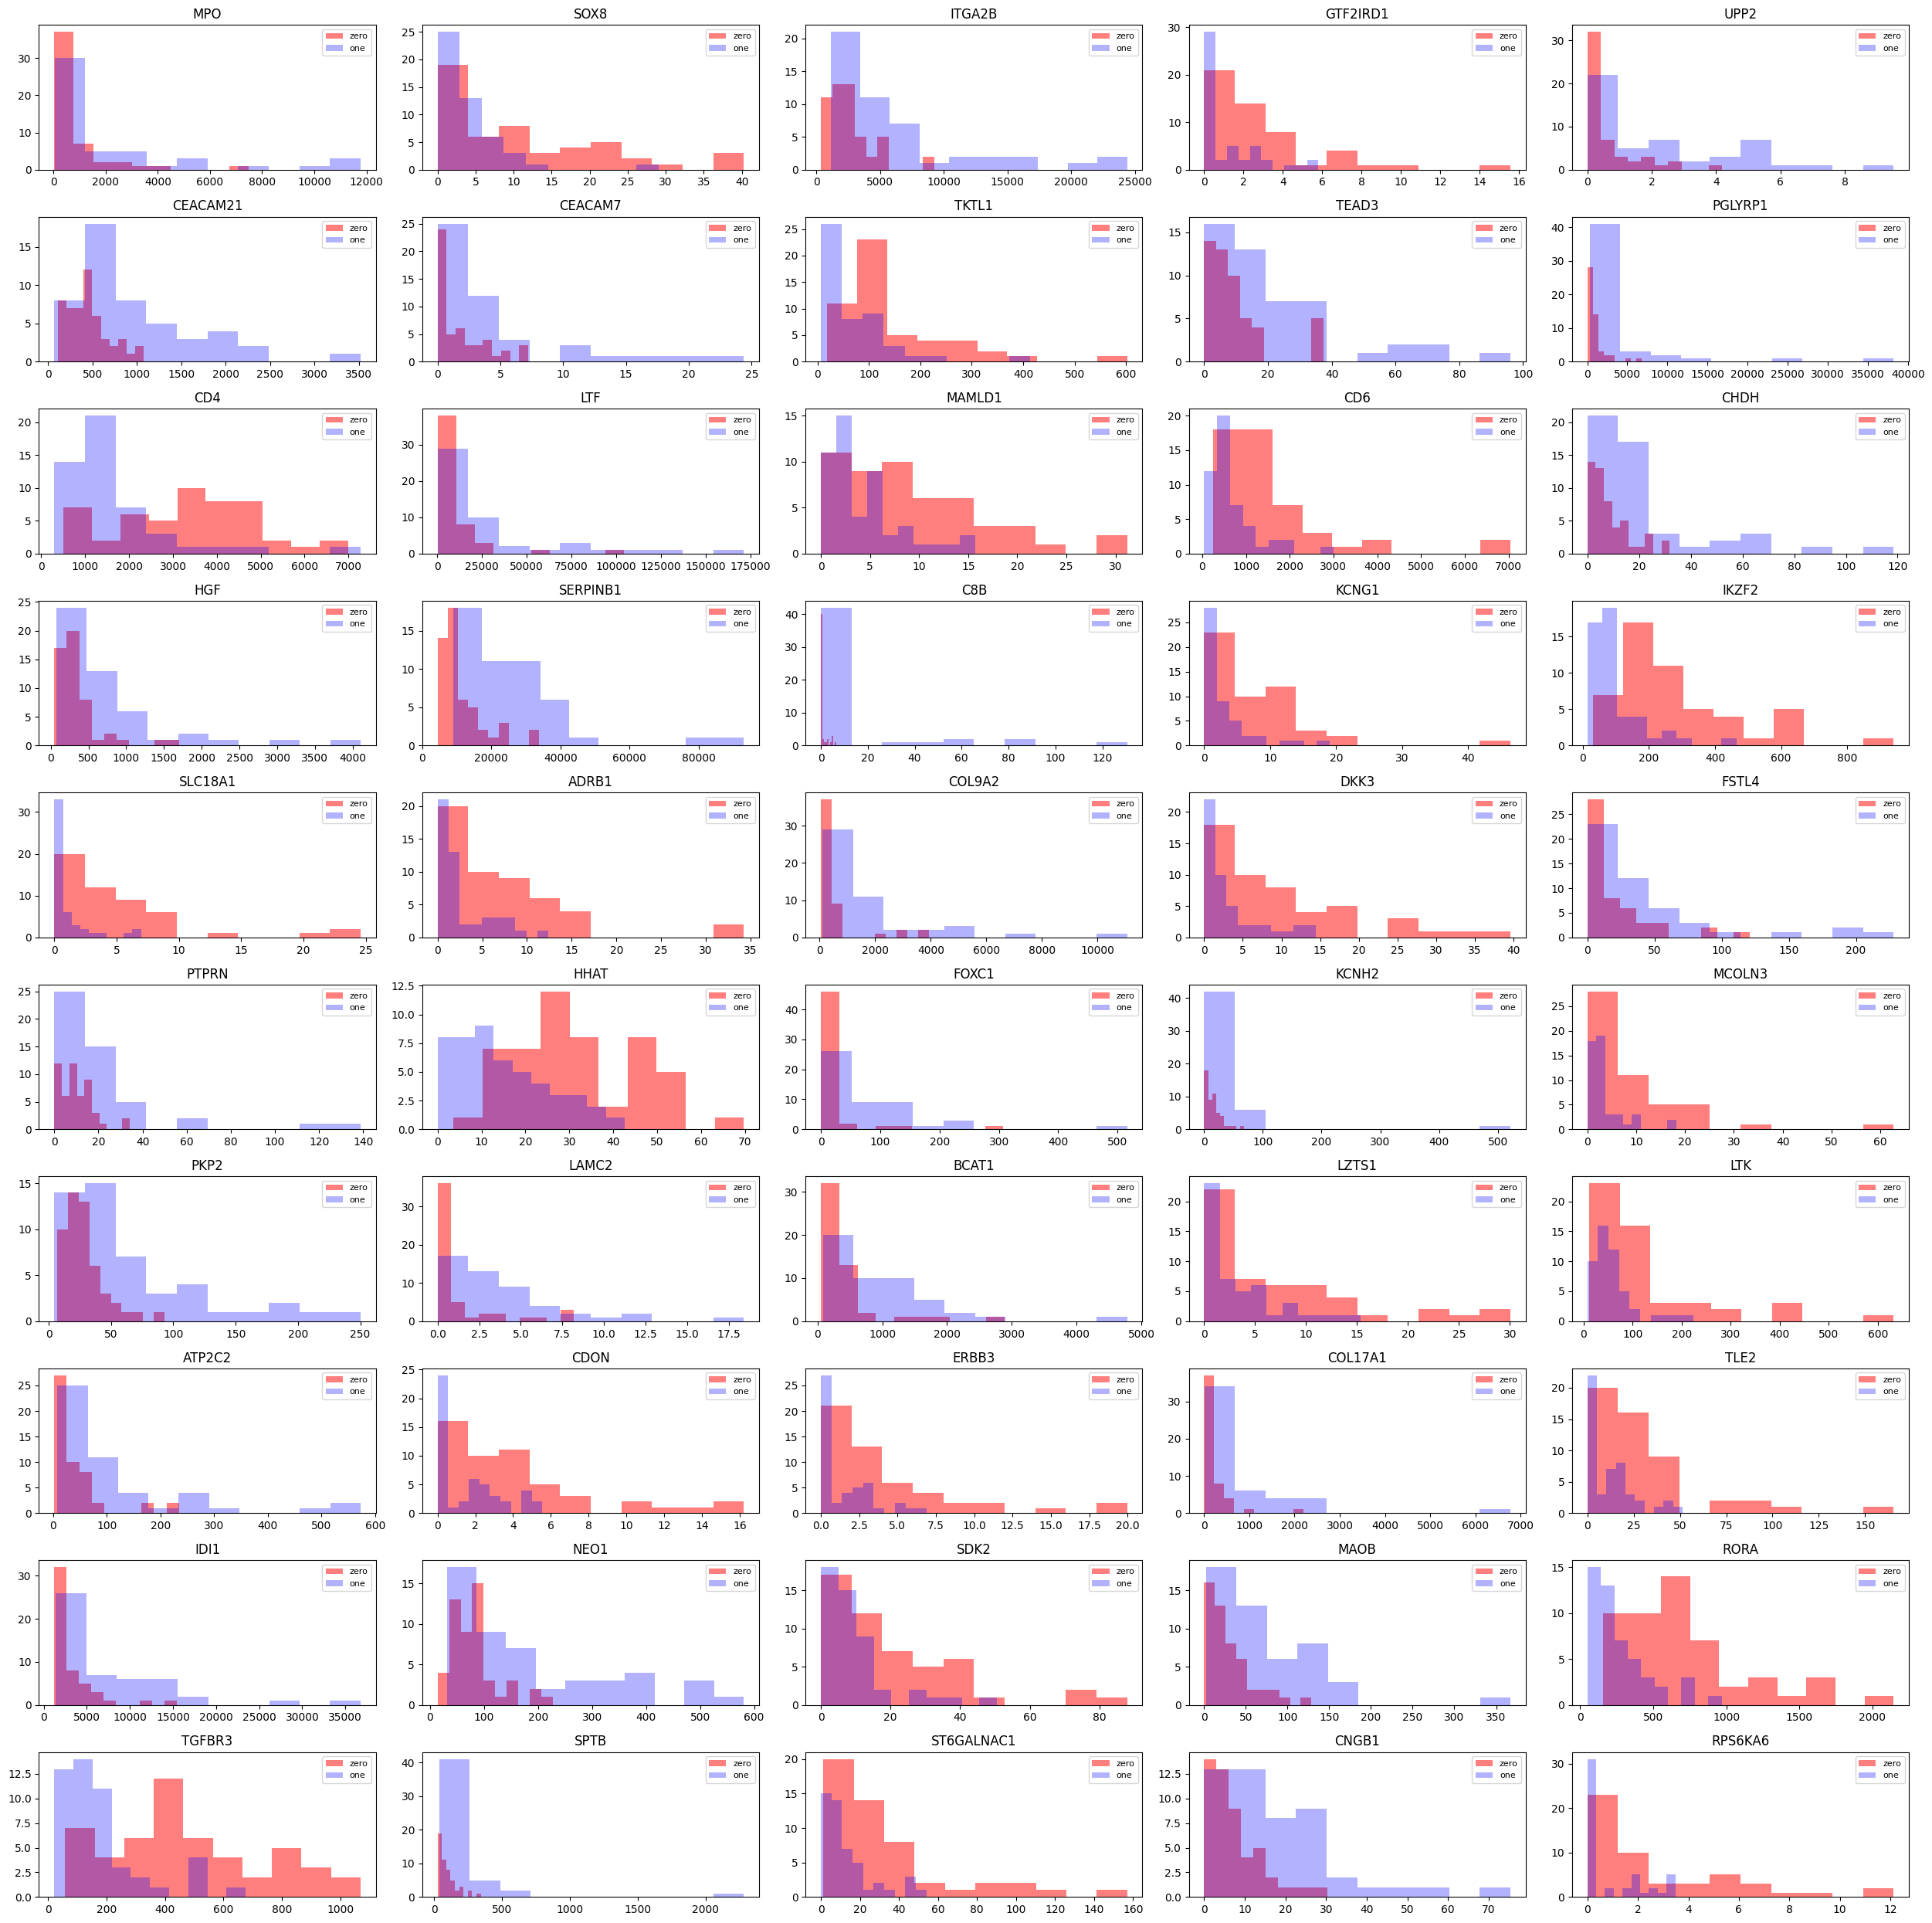

In [ ]:
#part of the dataset exploration
#distribution of each feature for the 'zero' and 'one' classes side by side, allowing  to compare their distributions visually
import numpy as np
import matplotlib.pyplot as plt
_, axes = plt.subplots(10,5, figsize=(25, 25))
zero = data[data['severity'] ==0]
one = data[data['severity'] ==1]

ax = axes.ravel()
for i in range(50):                   # for each of the features
    bins = 10
    #--- histogram for each feature---
    ax[i].hist(zero.iloc[:,i], bins=bins, color='r', alpha=.5)
    ax[i].hist(one.iloc[:,i], bins=bins, color='b', alpha=0.3)
    ax[i].set_title(data.columns[i], fontsize=12)
    ax[i].legend(['zero','one'], loc='best', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:

y_train = data.iloc[:, -1].values #data_f=oversampled data=raining set(x and y oversampled) itself, X_true_test and y_true_test remains for evaluation
X_train = data.iloc[:, :-1].values #ytrain and xtrain contains x-true-train-oversampled and y-true-train oversampled, ie. we will scale x-true-train-oversampled

In [ ]:
#Scaling process
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

scalar.fit(X_train)

# Scale in [0, 1]
scaled_data = scalar.transform(X_train)
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()

0         1         2         3    4         5         6         7    \
0  0.053836  0.138682  0.071051  0.089713  0.0  0.079564  0.057271  0.152851   
1  0.195908  0.000000  0.219031  0.151879  0.0  0.027643  0.000000  0.157426   
2  0.013203  0.057906  0.031600  0.149837  0.0  0.283124  0.286959  0.141441   
3  0.011893  0.407507  0.083295  0.000000  0.0  0.017176  0.058535  0.438258   
4  0.000000  0.000000  0.077184  0.000000  0.0  0.285536  0.000000  0.102142   

        8         9    ...       906       907       908       909       910  \
0  0.014541  0.008707  ...  0.129924  0.054615  0.005793  0.132762  0.048930   
1  0.049233  0.036258  ...  0.279940  0.105668  0.059292  0.032108  0.124254   
2  0.097141  0.018911  ...  0.118361  0.022339  0.006534  0.131986  0.000000   
3  0.029723  0.004501  ...  0.446657  0.077464  0.373614  0.012923  0.300059   
4  0.133441  0.009559  ...  0.216787  0.039055  0.025568  0.079115  0.081644   

        911       912       913       914       915  
0  0.228971  0.200574  0.105059  0.047766  0.041001  
1  0.124756  0.339559  0.533573  0.129383  0.000000  
2  0.026374  0.000000  0.000000  0.127643  0.022826  
3  0.242092  0.204999  0.000000  0.058583  0.000000  
4  0.083437  0.000000  0.000000  0.000000  0.045609  

[5 rows x 916 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.decomposition import PCA  # to apply PCA

#Applying PCA
#Taking different no. of Principal Components and evaluating them
components = [20]#[1,10,20,30,40,60,80]#[10]#[1,10,20][20]#[10]#
for component in components:
  pca = PCA(n_components = component)
  pca.fit(scaled_data) #pca takes x-true-train-oversampled that is scaled...scaled data=x, y-train=y-train all oversampled
  data_pca = pca.transform(scaled_data)
  columns = ["PC"+str(item) for item in range(1,component+1)]
  data_pca = pd.DataFrame(data_pca,columns=columns)
  #data_pca.head()

  X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(data_pca, y_train, test_size=0.20, random_state=42) #all oversampled, scaled data

  clf_true = RandomForestClassifier(n_estimators=1000)
  clf_true.fit(X_true_train,y_true_train)
  y_true_pred=clf_true.predict(X_true_test)
  '''
  from sklearn.svm import SVC


  clf_true = SVC(C=0.8, kernel='sigmoid')  # Use SVM classifier 'poly', 'rbf', 'linear', 'precomputed', 'sigmoid'
  clf_true.fit(X_true_train, y_true_train)
  y_true_pred = clf_true.predict(X_true_test)

  '''
  print("Base Accuracy:", metrics.accuracy_score(y_true_test, y_true_pred))
  print("Base classification report:", metrics.classification_report(y_true_test, y_true_pred))

  print("Base Accuracy_{} :".format(component),metrics.accuracy_score(y_true_test, y_true_pred))
  print("Base classification report {} :".format(component),metrics.classification_report(y_true_test, y_true_pred))



Base Accuracy: 0.8
Base classification report:               precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.71      0.71      0.71         7

    accuracy                           0.80        20
   macro avg       0.78      0.78      0.78        20
weighted avg       0.80      0.80      0.80        20

Base Accuracy_20 : 0.8
Base classification report 20 :               precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.71      0.71      0.71         7

    accuracy                           0.80        20
   macro avg       0.78      0.78      0.78        20
weighted avg       0.80      0.80      0.80        20



In [ ]:
data_pca2 = data_pca.copy()
data_pca2["severity"]= y_train
data_pca2.to_csv("/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/beta_severity_lfc_1_nosm_data_pca_all.csv")

In [ ]:
data_pca2.shape

(100, 21)

In [ ]:
data_pca2 = pd.DataFrame(data_pca2)
data_pca2.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.437760  0.232571 -1.874784 -0.384619  0.262070 -0.184504 -0.343099   
1  1.583188  0.659501 -0.955913 -0.774719 -0.233267  0.033563  0.023536   
2 -1.670227  0.034438 -1.667129  0.542386  0.317383 -0.118323 -0.278063   
3  4.433042 -0.343678  0.002466 -0.641845  0.046218  0.356412 -0.238400   
4 -0.451509 -0.561936 -1.057771 -0.047421  1.532733  0.245741 -0.022964   

        PC8       PC9      PC10  ...      PC12      PC13      PC14      PC15  \
0 -0.499001  0.362689  0.849445  ...  0.734581  0.966088  0.515922 -0.671336   
1  0.107865 -0.311877  0.644976  ...  0.168734  0.074416  0.741951  0.000963   
2 -0.329328  0.366758 -0.224815  ...  0.182061  1.066391 -0.137835 -0.132286   
3  0.919961 -0.935006  1.017077  ...  0.504767  0.663557 -0.064275  0.498773   
4 -0.141920  0.472665 -0.707860  ... -0.375870 -0.086337 -0.498352  0.353338   

       PC16      PC17      PC18      PC19      PC20  severity  
0  0.574769  0.218936  0.209685  0.301880  0.016778         1  
1 -0.102505  0.479025  0.368568 -0.375536  0.139877         0  
2 -0.337500  0.385899  0.274407  0.193100 -0.254718         1  
3  0.215091 -0.402875  0.281141  0.361400 -0.476745         0  
4 -0.231101  0.160347  0.140124  0.387350 -0.298336         0  

[5 rows x 21 columns]

In [ ]:
y = data_pca2.iloc[:, -1].values
X = data_pca2.iloc[:, :-1].values

In [ ]:
X = pd.DataFrame(X)
X.head()

0         1         2         3         4         5         6   \
0  1.437760  0.232571 -1.874784 -0.384619  0.262070 -0.184504 -0.343099   
1  1.583188  0.659501 -0.955913 -0.774719 -0.233267  0.033563  0.023536   
2 -1.670227  0.034438 -1.667129  0.542386  0.317383 -0.118323 -0.278063   
3  4.433042 -0.343678  0.002466 -0.641845  0.046218  0.356412 -0.238400   
4 -0.451509 -0.561936 -1.057771 -0.047421  1.532733  0.245741 -0.022964   

         7         8         9         10        11        12        13  \
0 -0.499001  0.362689  0.849445 -0.521959  0.734581  0.966088  0.515922   
1  0.107865 -0.311877  0.644976  0.574703  0.168734  0.074416  0.741951   
2 -0.329328  0.366758 -0.224815 -0.592983  0.182061  1.066391 -0.137835   
3  0.919961 -0.935006  1.017077  1.134880  0.504767  0.663557 -0.064275   
4 -0.141920  0.472665 -0.707860  0.246989 -0.375870 -0.086337 -0.498352   

         14        15        16        17        18        19  
0 -0.671336  0.574769  0.218936  0.209685  0.301880  0.016778  
1  0.000963 -0.102505  0.479025  0.368568 -0.375536  0.139877  
2 -0.132286 -0.337500  0.385899  0.274407  0.193100 -0.254718  
3  0.498773  0.215091 -0.402875  0.281141  0.361400 -0.476745  
4  0.353338 -0.231101  0.160347  0.140124  0.387350 -0.298336

In [ ]:

from tensorflow.keras.layers import Dropout

#defining the generator neural network
def build_generator():
    noise_input = Input(shape=(10,))
    label_input = Input(shape=(1,))  # Only 1 class for filtered data
    inputs = Concatenate()([noise_input, label_input])
    model = Dense(1024, input_dim=11)(inputs)
    model = LeakyReLU(alpha=0.2)(model)
    model = Dropout(0.3)(model)  # Add dropout after the first layer
    model = Dense(1024)(model)
    model = LeakyReLU(alpha=0.2)(model)
    model = Dropout(0.3)(model)  # Add dropout after the second layer
    gen_data = Dense(X_true_train.shape[1], activation='linear')(model)
    return Model([noise_input, label_input], gen_data)

# defining the discriminator network
def build_discriminator():
    data_input = Input(shape=(X_true_train.shape[1],))
    label_input = Input(shape=(1,))  # Only 1 class for filtered data
    inputs = Concatenate()([data_input, label_input])
    model = Dense(1024, input_dim=X_true_train.shape[1] + 1)(inputs)
    model = LeakyReLU(alpha=0.2)(model)
    model = Dense(1024)(model)
    model = LeakyReLU(alpha=0.2)(model)
    validity = Dense(1, activation='sigmoid')(model)
    return Model([data_input, label_input], validity)

# defining the cGAN model
def build_cgan(generator, discriminator):
    noise_input = Input(shape=(10,))
    label_input = Input(shape=(1,))  # Only 1 class for filtered data
    gen_data = generator([noise_input, label_input])
    cgan_output = discriminator([gen_data, label_input])
    return Model([noise_input, label_input], cgan_output)

# def plot_history_(d_hist, g_hist, filename):
#     plt.plot(d_hist, label='Discriminator')
#     plt.plot(g_hist, label='Generator')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()
#     plt.savefig(filename)
#     plt.close()

# def plot_history_1(d_hist, g_hist):
#     # plot loss
#     plt.subplot(1, 1, 1)
#     plt.plot(d_hist, label='d')
#     plt.plot(g_hist, label='gen')
#     plt.show()
#     plt.close()

def plot_history(d_hist, g_hist):
    plt.subplot(1, 1, 1)
    plt.plot(d_hist, label='Disc')
    plt.plot(g_hist, label='Gen')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plt.close()

# Here is the training loop
def train_cgan(generator, discriminator, cgan, x_train, y_train, epochs=12000, batch_size=64):
    d_history = []
    g_history = []

    for epoch in range(epochs):
        # Selecting a random batch of real data
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_data = x_train.iloc[idx]
        labels = pd.DataFrame(y_train).iloc[idx]

        noise = np.random.normal(0, 1, (batch_size, 10))

        gen_data = generator.predict([noise, labels])

        # Training of the discriminator
        d_loss_real = discriminator.train_on_batch([real_data, labels], np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch([gen_data, labels], np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Training of the generator
        g_loss = cgan.train_on_batch([noise, labels], np.ones((batch_size, 1)))

        # Print the progress
        if epoch % 1000 == 0:
            print(f"Epoch: {epoch} | Discriminator Loss: {d_loss} | Generator Loss: {g_loss}")

        d_history.append(d_loss)
        g_history.append(g_loss)

    plot_history(d_history, g_history)

    generator.save('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/beta_severity_lfc_1_nosm_trained_generated_model_5_all.h5')

def generate_data(generator, num_samples, label):
    noise = np.random.normal(0, 1, (num_samples, 10))
    labels = np.ones((num_samples, 1)) * label
    gen_data = generator.predict([noise, labels])
    gen_data_with_labels = np.concatenate((gen_data, labels), axis=1)
    return gen_data_with_labels


def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)



In [ ]:
# biildinh and compiling the models

generator = build_generator()
discriminator = build_discriminator()

discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.00001), metrics=['accuracy'])

cgan = build_cgan(generator, discriminator)
cgan.compile(loss='binary_crossentropy', optimizer=Adam(0.00001))


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 10ms/step
Epoch: 8000 | Discriminator Loss: [0.74008012 0.5       ] | Generator Loss: 0.35827451944351196
2/2 [==============================] - 0s 15ms/step
Epoch: 9000 | Discriminator Loss: [0.72834469 0.5       ] | Generator Loss: 0.3550303280353546
2/2 [==============================] - 0s 12ms/step
Epoch: 10000 | Discriminator Loss: [0.76231319 0.5       ] | Generator Loss: 0.3262237012386322
2/2 [==============================] - 0s 10ms/step
Epoch: 11000 | Discriminator Loss: [0.76432632 0.5       ] | Generator Loss: 0.3215101957321167
2/2 [==============================] - 0s 9ms/step


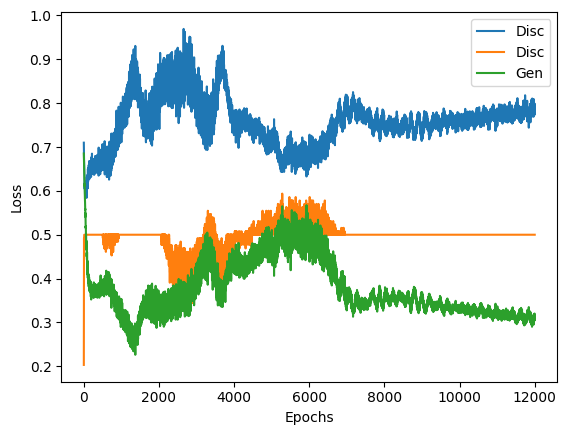

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
train_cgan(generator, discriminator, cgan, X, y)

In [ ]:
from keras.models import load_model
generator = load_model('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/beta_severity_lfc_1_nosm_trained_generated_model_5_all.h5')

In [ ]:
#we want to generate 5000 samples for class 1
num_samples = 5000
class_label = 1

synthetic_data_normalized = generate_data(generator, num_samples, class_label)
save_to_csv(synthetic_data_normalized, '/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/beta_severity_lfc_1_nosm_generated_data__class1_all.csv')

157/157 [==============================] - 1s 6ms/step


In [ ]:
#generating data for class label 0 which is the "less-severe" class
num_samples = 5000
class_label = 0

# Generating synthetic data
synthetic_data_normalized = generate_data(generator, num_samples, class_label)


save_to_csv(synthetic_data_normalized, '/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/beta_severity_lfc_1_nosm_generated_data__class0_all.csv')

157/157 [==============================] - 1s 6ms/step


In [ ]:
#merge the two synthetic datasets

class1 = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/beta_severity_lfc_1_nosm_generated_data__class1_all.csv')
class0 = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/beta_severity_lfc_1_nosm_generated_data__class0_all.csv')

class1.head()

0         1         2         3         4         5         6  \
0 -0.640524  0.001801 -2.311211 -0.460551 -0.329624 -1.243344  0.825680   
1 -1.811373 -0.777659 -1.593342 -0.889078 -0.748209  0.874519  0.594544   
2 -1.686317 -0.168708 -0.476293 -0.111889 -0.615470 -0.611964  0.141028   
3 -1.495464 -0.640031 -1.115442 -0.923310  0.395073  0.218302  0.443009   
4 -1.203002  0.291637 -0.993346 -0.281843 -0.682977 -0.034873 -0.101263   

          7         8         9  ...        11        12        13        14  \
0 -0.005268  0.882969 -0.166016  ... -0.127607  0.530155 -1.020276  0.683937   
1 -0.111207 -0.547383  0.307999  ... -0.022340 -0.449025 -0.909933 -0.358503   
2 -0.678723  1.313737 -0.004809  ...  0.366140  0.130080 -0.219032  0.246151   
3 -0.986791  0.561782 -0.066048  ...  0.595393 -0.330130 -0.120629 -0.177551   
4 -0.223570  0.086241  0.191653  ... -0.178022 -0.726236  0.174768 -0.477572   

         15        16        17        18        19   20  
0  0.586318  0.100888 -0.033760  1.244499 -0.330269  1.0  
1  0.017425 -0.088914 -0.465790  0.239499  0.743692  1.0  
2  0.444237 -0.093387  0.661812  0.168289  0.066772  1.0  
3 -0.082147 -0.107348  0.436640 -0.081570  0.099453  1.0  
4  0.261398  0.022101 -0.095809 -0.512227  0.494380  1.0  

[5 rows x 21 columns]

In [ ]:
#merge the two dataset into a single one
# Append the 2 dataframes vertically
combined_df = pd.concat([class1, class0], ignore_index=True)

combined_df.to_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/beta_severity_lfc_1_nosm_generated_data_combined_classes_all.csv', index=False)

combined_df.columns = data_pca2.columns

combined_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.640524  0.001801 -2.311211 -0.460551 -0.329624 -1.243344  0.825680   
1 -1.811373 -0.777659 -1.593342 -0.889078 -0.748209  0.874519  0.594544   
2 -1.686317 -0.168708 -0.476293 -0.111889 -0.615470 -0.611964  0.141028   
3 -1.495464 -0.640031 -1.115442 -0.923310  0.395073  0.218302  0.443009   
4 -1.203002  0.291637 -0.993346 -0.281843 -0.682977 -0.034873 -0.101263   

        PC8       PC9      PC10  ...      PC12      PC13      PC14      PC15  \
0 -0.005268  0.882969 -0.166016  ... -0.127607  0.530155 -1.020276  0.683937   
1 -0.111207 -0.547383  0.307999  ... -0.022340 -0.449025 -0.909933 -0.358503   
2 -0.678723  1.313737 -0.004809  ...  0.366140  0.130080 -0.219032  0.246151   
3 -0.986791  0.561782 -0.066048  ...  0.595393 -0.330130 -0.120629 -0.177551   
4 -0.223570  0.086241  0.191653  ... -0.178022 -0.726236  0.174768 -0.477572   

       PC16      PC17      PC18      PC19      PC20  severity  
0  0.586318  0.100888 -0.033760  1.244499 -0.330269       1.0  
1  0.017425 -0.088914 -0.465790  0.239499  0.743692       1.0  
2  0.444237 -0.093387  0.661812  0.168289  0.066772       1.0  
3 -0.082147 -0.107348  0.436640 -0.081570  0.099453       1.0  
4  0.261398  0.022101 -0.095809 -0.512227  0.494380       1.0  

[5 rows x 21 columns]

In [ ]:
combined_df = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/beta_severity_lfc_1_nosm_generated_data_combined_classes_all.csv')
combined_df.shape

(10000, 21)

In [ ]:
data_gen = combined_df.iloc[:, :-1].values
data_gen

array([[-6.40523970e-01,  1.80070370e-03, -2.31121063e+00, ...,
        -3.37597504e-02,  1.24449909e+00, -3.30268651e-01],
       [-1.81137347e+00, -7.77659059e-01, -1.59334219e+00, ...,
        -4.65790272e-01,  2.39499435e-01,  7.43691623e-01],
       [-1.68631697e+00, -1.68708071e-01, -4.76292819e-01, ...,
         6.61811769e-01,  1.68288544e-01,  6.67720959e-02],
       ...,
       [-1.75059271e+00,  6.17418170e-01,  1.08387780e+00, ...,
         7.75503218e-02, -4.77197528e-01,  4.45541412e-01],
       [-3.52515168e-02, -1.99468866e-01, -8.28568995e-01, ...,
         1.18959792e-01, -6.75413847e-01,  2.47183427e-01],
       [-2.85918921e-01,  4.34323043e-01, -3.21834683e-02, ...,
        -1.43340692e-01, -4.44985360e-01,  2.78778851e-01]])

In [ ]:
data_gen = pd.DataFrame(data_gen)
data_gen.head()

0         1         2         3         4         5         6   \
0 -0.640524  0.001801 -2.311211 -0.460551 -0.329624 -1.243344  0.825680   
1 -1.811373 -0.777659 -1.593342 -0.889078 -0.748209  0.874519  0.594544   
2 -1.686317 -0.168708 -0.476293 -0.111889 -0.615470 -0.611964  0.141028   
3 -1.495464 -0.640031 -1.115442 -0.923310  0.395073  0.218302  0.443009   
4 -1.203002  0.291637 -0.993346 -0.281843 -0.682977 -0.034873 -0.101263   

         7         8         9         10        11        12        13  \
0 -0.005268  0.882969 -0.166016 -0.172566 -0.127607  0.530155 -1.020276   
1 -0.111207 -0.547383  0.307999 -0.325083 -0.022340 -0.449025 -0.909933   
2 -0.678723  1.313737 -0.004809 -0.445527  0.366140  0.130080 -0.219032   
3 -0.986791  0.561782 -0.066048 -0.397292  0.595393 -0.330130 -0.120629   
4 -0.223570  0.086241  0.191653  0.103052 -0.178022 -0.726236  0.174768   

         14        15        16        17        18        19  
0  0.683937  0.586318  0.100888 -0.033760  1.244499 -0.330269  
1 -0.358503  0.017425 -0.088914 -0.465790  0.239499  0.743692  
2  0.246151  0.444237 -0.093387  0.661812  0.168289  0.066772  
3 -0.177551 -0.082147 -0.107348  0.436640 -0.081570  0.099453  
4 -0.477572  0.261398  0.022101 -0.095809 -0.512227  0.494380

In [ ]:
df_orig = pca.inverse_transform(data_gen)
df_or = pd.DataFrame(df_orig)
df_or.head()
df_o =scalar.inverse_transform(df_or)
df_back =pd.DataFrame(df_o)
df_back["severity"] = combined_df.iloc[:, -1]
df_back.to_csv("/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/beta_severity_lfc_1_nosm_data_gen_all.csv",index=False)
df_back.head()

0         1            2         3         4           5  \
0   779.181016  0.429672  2310.301927 -1.440672 -0.053863  613.866248   
1  1211.648160  3.446936  -779.390423  0.212931  1.956722  407.468174   
2  1783.133870  4.077150  6570.196088  0.799731  0.690754  986.865034   
3   710.820123  1.142533  2366.351165  0.205881  1.428887  795.682259   
4  2747.937134  3.328302  5356.644747  1.276026  2.368636  624.571429   

          6           7          8            9  ...        907         908  \
0  1.598518  175.655270  -4.265464  -298.846491  ...  34.985193  211.936820   
1  3.252996   40.562263  19.399477  -554.864306  ...  -9.295127 -227.285537   
2  3.442838  135.611356   4.074906  1542.546310  ...  36.589977  146.453161   
3  3.711933   74.107066   8.988318  -617.587113  ... -13.311138 -195.343745   
4  3.755854   85.854182  19.204233  2295.261491  ...  32.010387   18.020451   

         909       910        911       912       913        914       915  \
0 -11.027173  5.248611 -24.953879  1.246302  0.671546  23.745681 -4.961381   
1  43.145021  2.588781  28.059733  3.191680  1.422140  14.723473  0.593098   
2  47.237751  4.866240   1.271799  0.904340  0.759517  19.206391  1.369626   
3  57.152965  0.710269  21.322861  1.098215  0.187813  16.865459  5.612978   
4  38.144084  4.983187  13.523771  1.664497  2.142750   6.852475  3.792067   

   severity  
0       1.0  
1       1.0  
2       1.0  
3       1.0  
4       1.0  

[5 rows x 917 columns]

In [ ]:
!pip install table_evaluator

In [ ]:
from table_evaluator import *

real = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/myDataset_numerized_severity_lfc_1_DEGs_transposed.csv')
fake = pd.read_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/beta_severity_lfc_1_nosm_data_gen_all.csv')

fake.columns = real.columns

fake.head()

MPO      SOX8       ITGA2B  GTF2IRD1      UPP2    CEACAM21  \
0   779.181016  0.429672  2310.301927 -1.440672 -0.053863  613.866248   
1  1211.648160  3.446936  -779.390423  0.212931  1.956722  407.468174   
2  1783.133870  4.077150  6570.196088  0.799731  0.690754  986.865034   
3   710.820123  1.142533  2366.351165  0.205881  1.428887  795.682259   
4  2747.937134  3.328302  5356.644747  1.276026  2.368636  624.571429   

    CEACAM7       TKTL1      TEAD3      PGLYRP1  ...      FCGBP      CCL4L2  \
0  1.598518  175.655270  -4.265464  -298.846491  ...  34.985193  211.936820   
1  3.252996   40.562263  19.399477  -554.864306  ...  -9.295127 -227.285537   
2  3.442838  135.611356   4.074906  1542.546310  ...  36.589977  146.453161   
3  3.711933   74.107066   8.988318  -617.587113  ... -13.311138 -195.343745   
4  3.755854   85.854182  19.204233  2295.261491  ...  32.010387   18.020451   

   LOC102723475  LOC102723996       NEFL     TEX52    PRRT1B  SEPT5.GP1BB  \
0    -11.027173      5.248611 -24.953879  1.246302  0.671546    23.745681   
1     43.145021      2.588781  28.059733  3.191680  1.422140    14.723473   
2     47.237751      4.866240   1.271799  0.904340  0.759517    19.206391   
3     57.152965      0.710269  21.322861  1.098215  0.187813    16.865459   
4     38.144084      4.983187  13.523771  1.664497  2.142750     6.852475   

   LOC122319436  severity  
0     -4.961381       1.0  
1      0.593098       1.0  
2      1.369626       1.0  
3      5.612978       1.0  
4      3.792067       1.0  

[5 rows x 917 columns]

In [ ]:
real.head()

MPO       SOX8       ITGA2B  GTF2IRD1  UPP2     CEACAM21   CEACAM7  \
0   660.358182   5.584424  2058.558435  1.396106   0.0   345.536258  1.396106   
1  2329.249354   0.000000  5616.906229  2.363520   0.0   166.628188  0.000000   
2   183.042083   2.331746  1109.911227  2.331746   0.0  1046.954078  6.995239   
3   167.661469  16.409420  2352.968197  0.000000   0.0   130.561910  1.426906   
4    27.954080   0.000000  2206.042830  0.000000   0.0  1055.266528  0.000000   

        TKTL1      TEAD3      PGLYRP1  ...      FCGBP       CCL4L2  \
0   97.727427   1.396106   351.818736  ...  34.204599    30.016281   
1  100.449617   4.727041  1403.931117  ...  66.178571   219.807397   
2   90.938105   9.326985   741.495316  ...  13.990478    32.644448   
3  267.544898   2.853812   191.205421  ...  48.514808  1334.870678   
4   67.555694  12.812287   384.368603  ...  24.459820   100.168787   

   LOC102723475  LOC102723996       NEFL     TEX52    PRRT1B  SEPT5.GP1BB  \
0     29.318228      1.396106  60.730615  2.094159  1.396106     3.490265   
1      7.090561      3.545281  33.089286  3.545281  7.090561     9.454082   
2     29.146828      0.000000   6.995239  0.000000  0.000000     9.326985   
3      2.853812      8.561437  64.210776  2.140359  0.000000     4.280718   
4     17.471300      2.329507  22.130314  0.000000  0.000000     0.000000   

   LOC122319436  severity  
0      2.094159         1  
1      0.000000         0  
2      1.165873         1  
3      0.000000         0  
4      2.329507         0  

[5 rows x 917 columns]

In [ ]:
real.shape

(100, 917)

In [ ]:
fake.shape

(10000, 917)

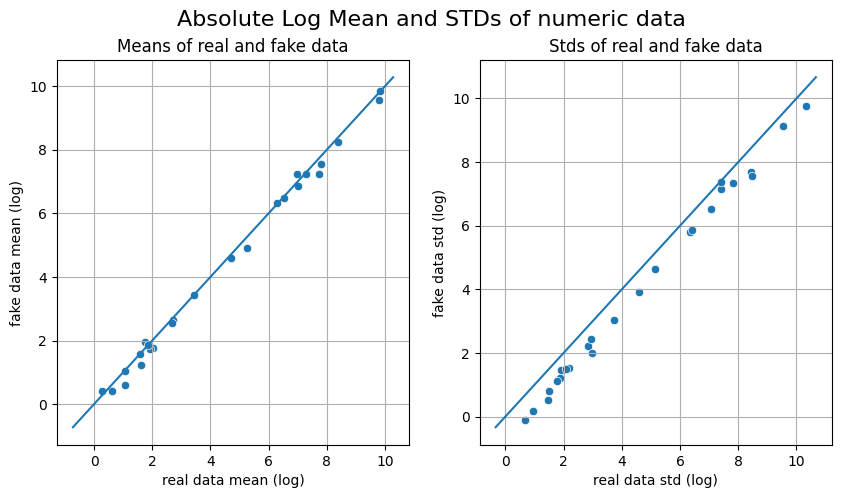

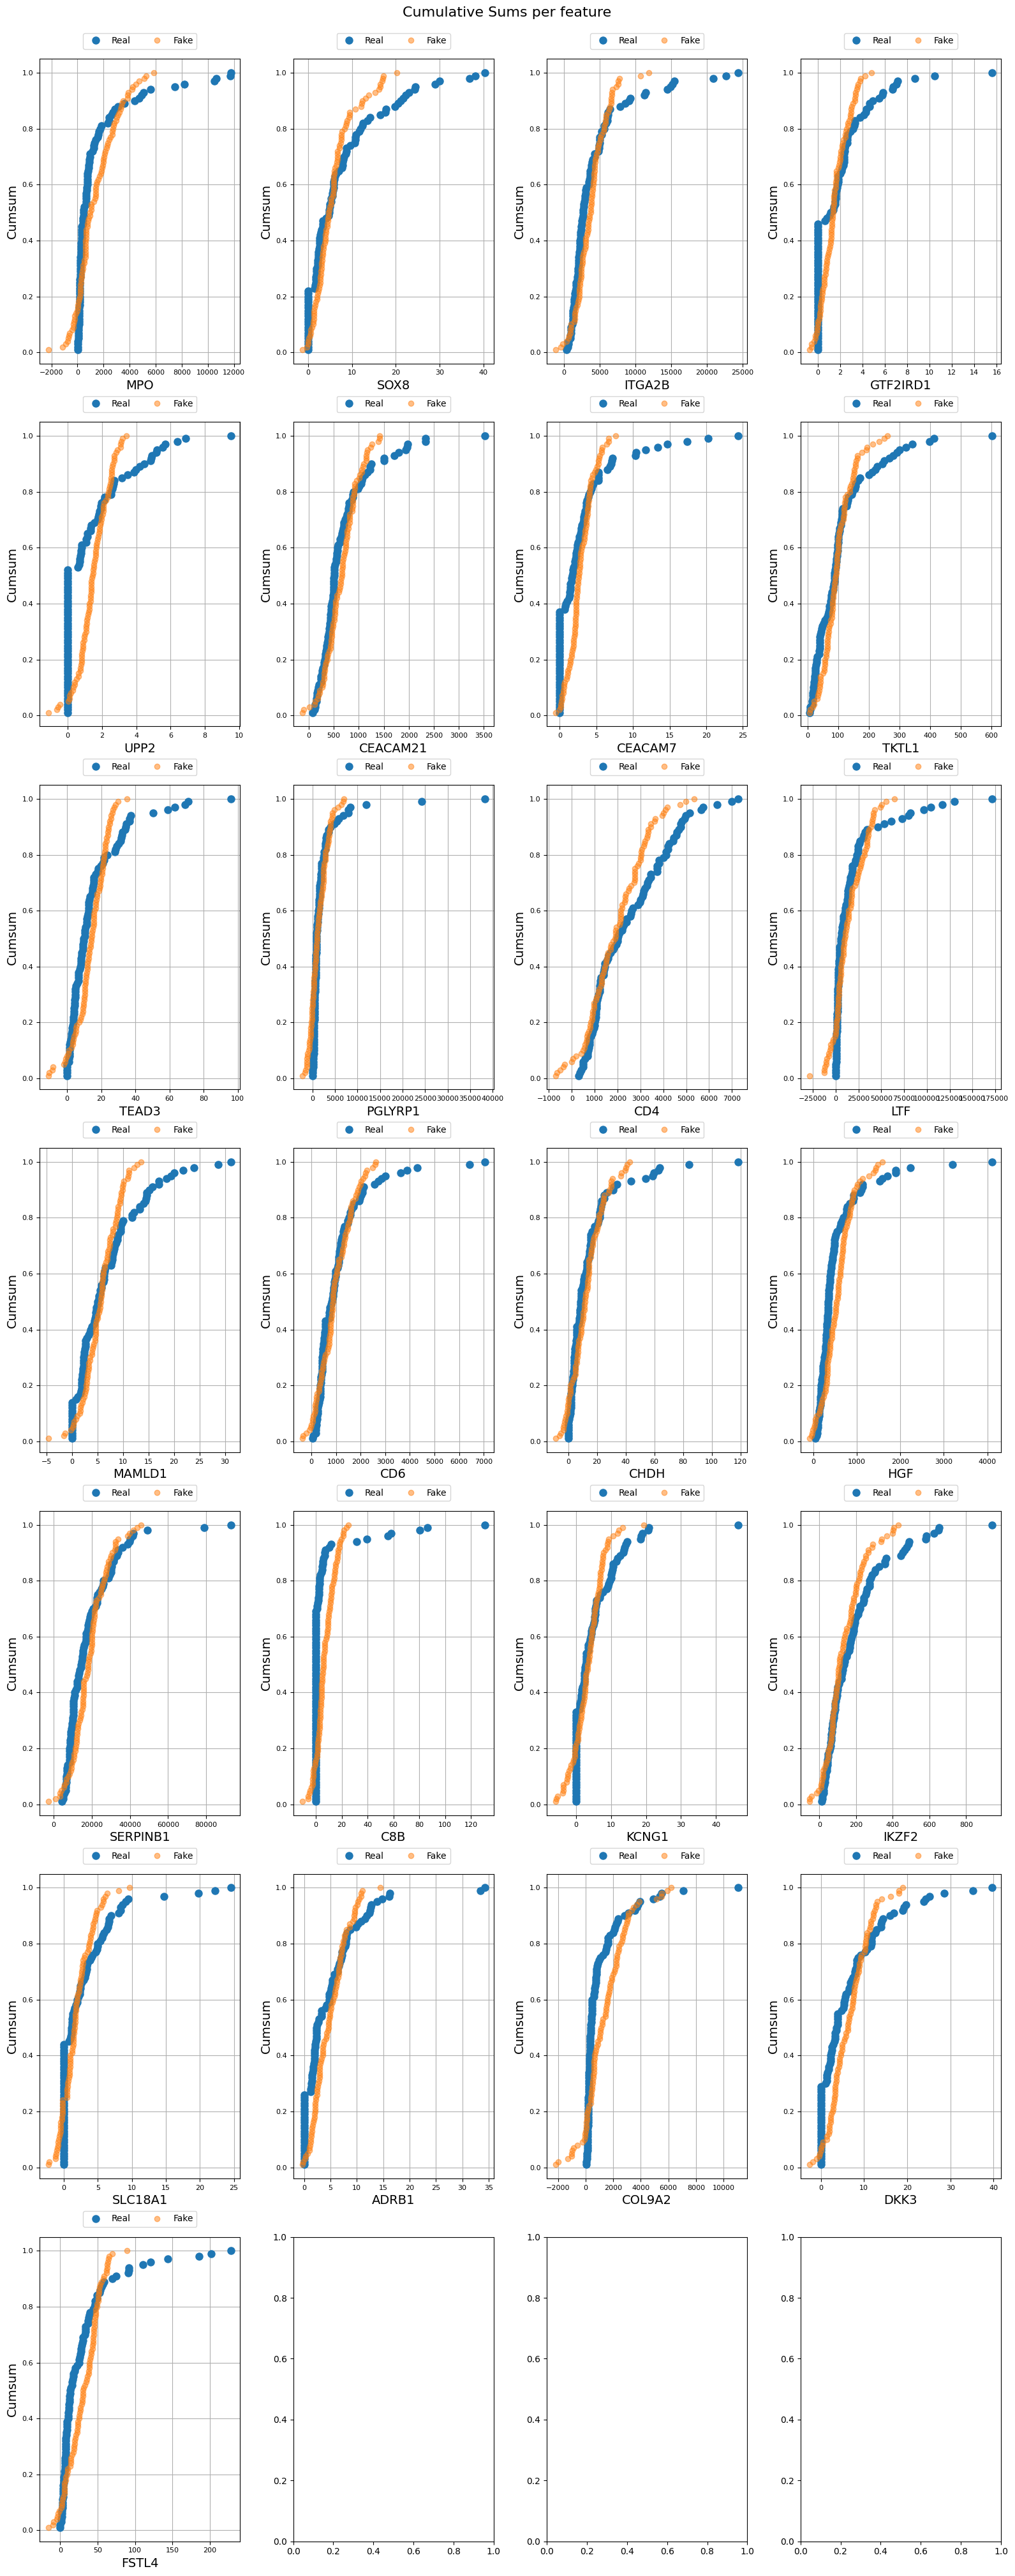

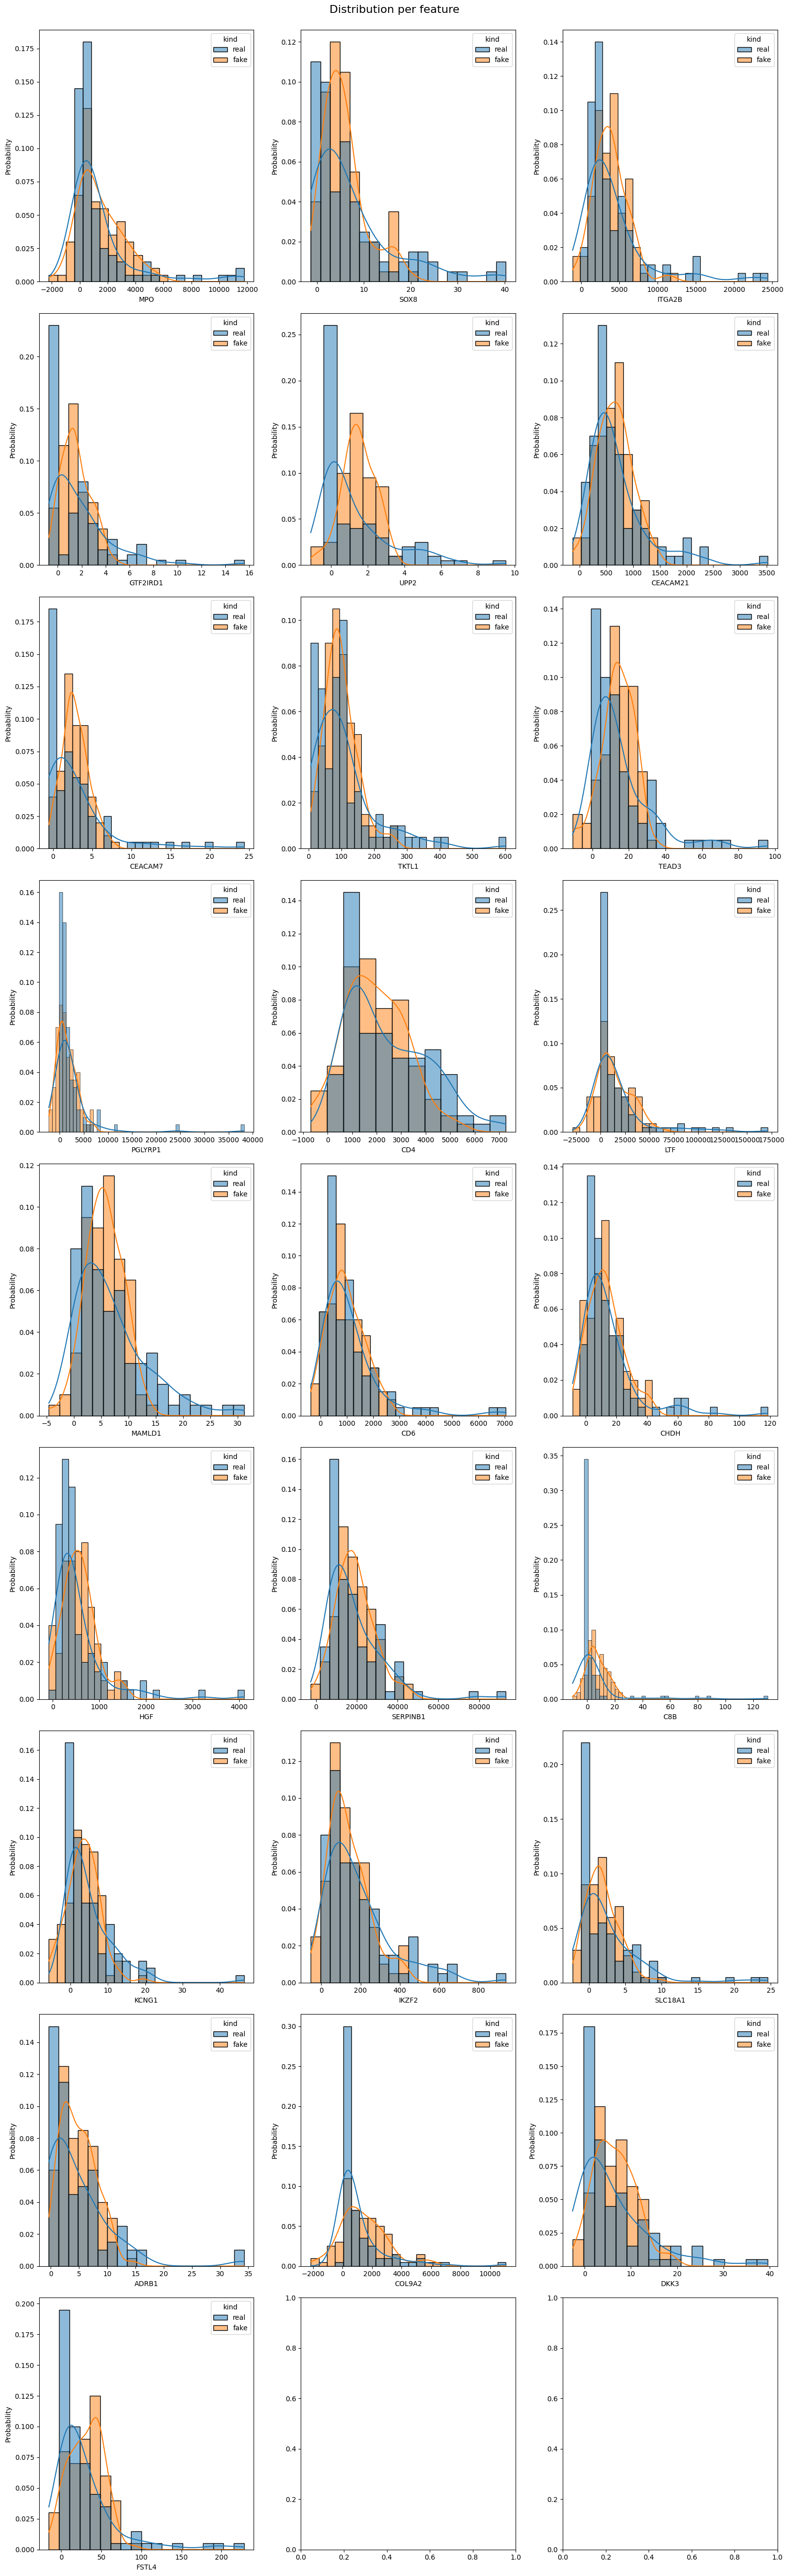

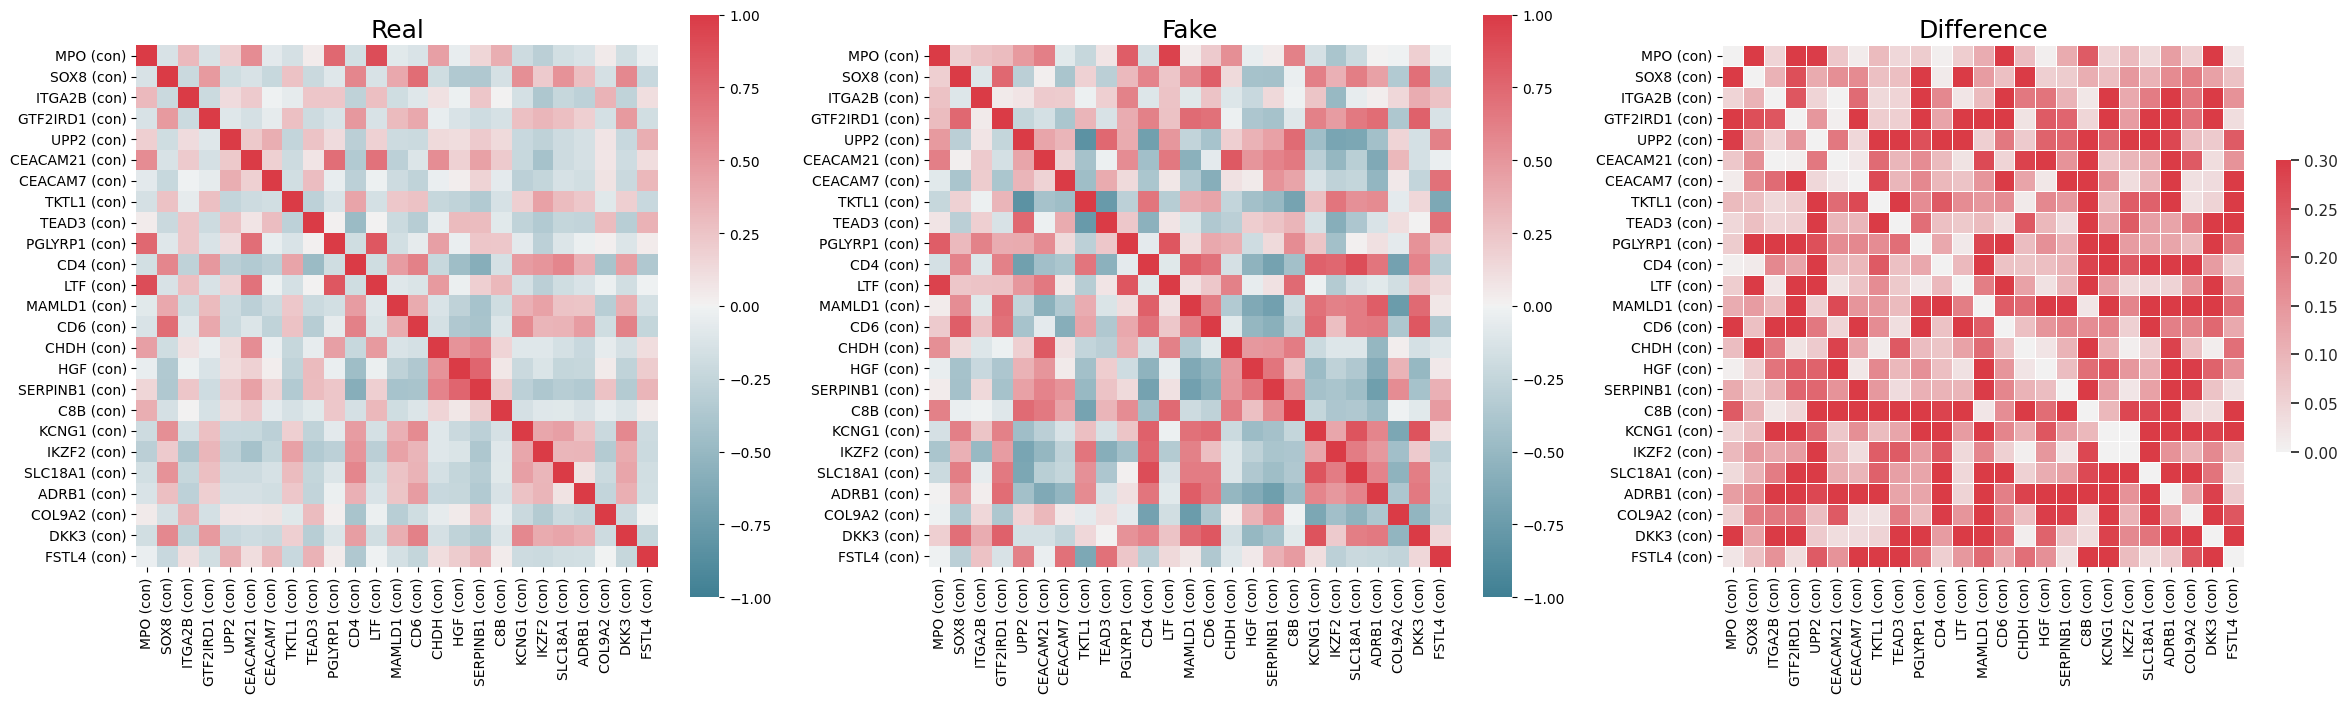

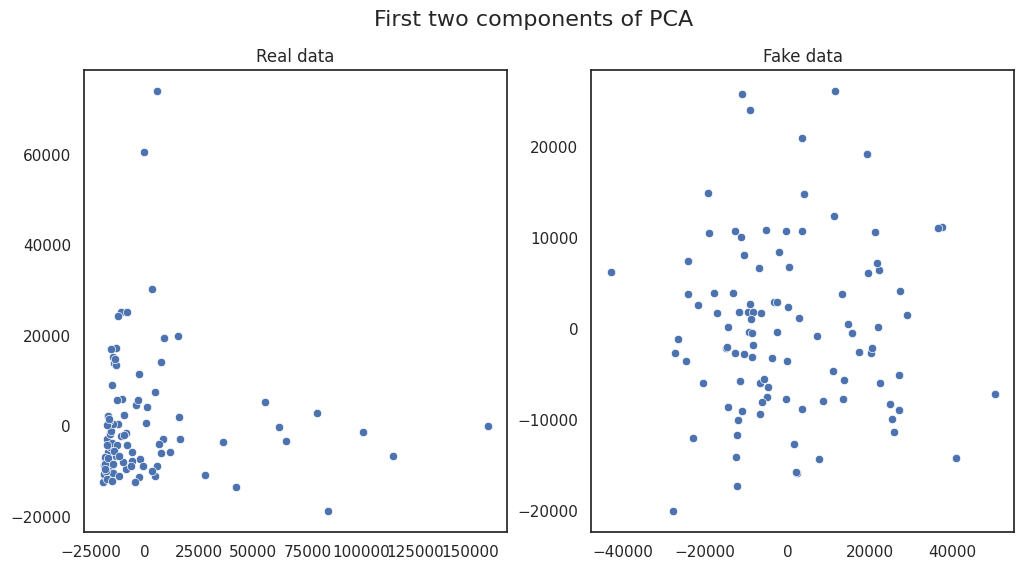

In [ ]:
# Evaluation using table_evaluator

selected_vars = fake.columns[0:25]

real_subset = real[selected_vars]
fake_subset = fake[selected_vars]


table_evaluator = TableEvaluator(real_subset, fake_subset)
table_evaluator.visual_evaluation()

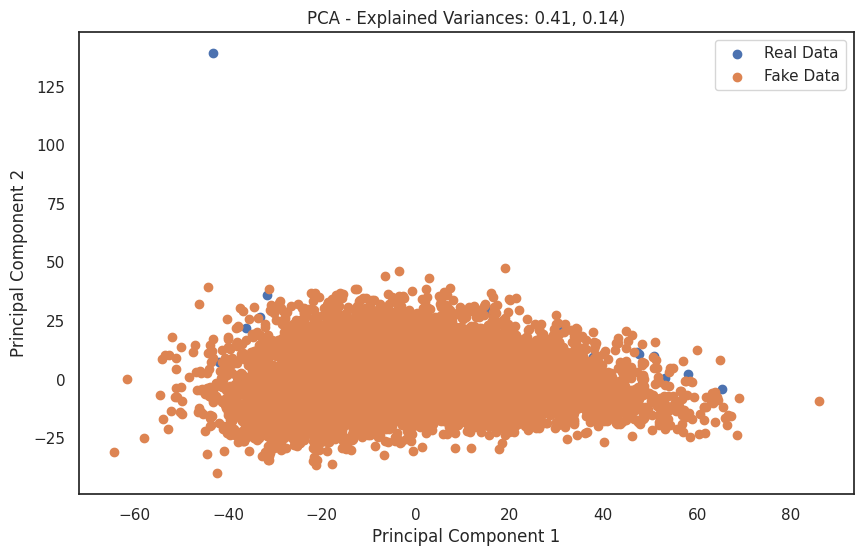

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#PCA of real and fake data to see if they overlap

combined_data = pd.concat([real, fake], ignore_index=True)
x_scaled = StandardScaler().fit_transform(combined_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_scaled)

real_pca = pca_result[:len(real)]
fake_pca = pca_result[len(real):]


explained_variances = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.scatter(real_pca[:, 0], real_pca[:, 1], label='Real Data')
plt.scatter(fake_pca[:, 0], fake_pca[:, 1], label='Fake Data')
plt.title('PCA - Explained Variances: {:.2f}, {:.2f})'.format(*explained_variances))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
fake["severity"].value_counts()

severity
1.0    5000
0.0    5000
Name: count, dtype: int64

In [ ]:
fake.shape

(10000, 917)

In [ ]:
combined_data.shape

(10100, 917)

In [ ]:
y_train = combined_data.iloc[:, -1].values
X_train = combined_data.iloc[:, :-1].values

In [ ]:
X_train.shape

(10100, 916)

In [ ]:
y_train.shape

(10100,)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# RF evaluation with 5 fold cross validation
clf_true = RandomForestClassifier(n_estimators=100)

cv_scores = cross_val_score(clf_true, X_train, y_train, cv=5, scoring='accuracy')  #the number of folds ( orcv) can be adjusted

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

y_true_pred_cv = cross_val_predict(clf_true, X_train, y_train, cv=5)  # fit is called implicitly here
print("Cross-Validation classification report:")
print(metrics.classification_report(y_train, y_true_pred_cv))


Cross-Validation Scores: [0.98118812 0.99356436 0.98960396 0.99207921 0.99356436]
Mean Accuracy: 0.99
Cross-Validation classification report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5051
         1.0       1.00      0.99      0.99      5049

    accuracy                           0.99     10100
   macro avg       0.99      0.99      0.99     10100
weighted avg       0.99      0.99      0.99     10100



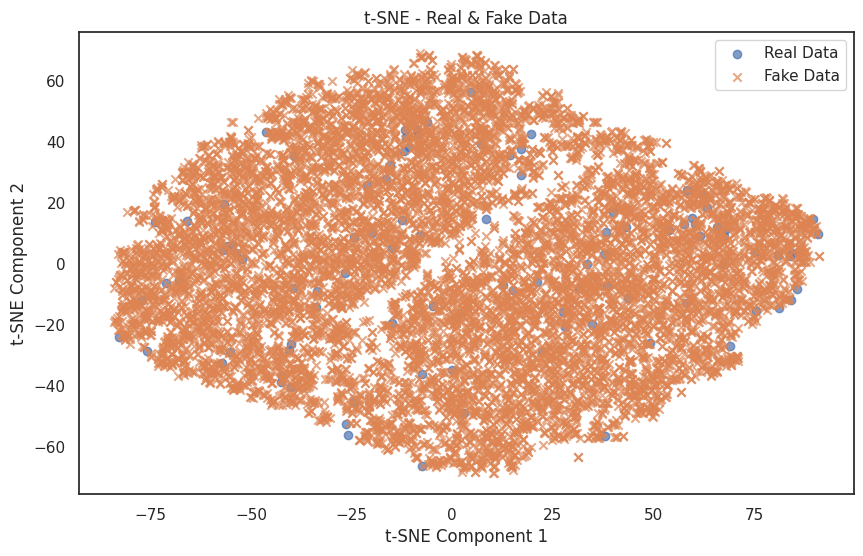

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE  # Import t-SNE from scikit-learn

#see if real and fake data overlap

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(x_scaled)

real_tsne = tsne_result[:len(real)]
fake_tsne = tsne_result[len(real):]

plt.figure(figsize=(10, 6))
plt.scatter(real_tsne[:, 0], real_tsne[:, 1], label='Real Data', alpha=0.7, marker='o')
plt.scatter(fake_tsne[:, 0], fake_tsne[:, 1], label='Fake Data', alpha=0.7, marker='x')
plt.title('t-SNE - Real & Fake Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()



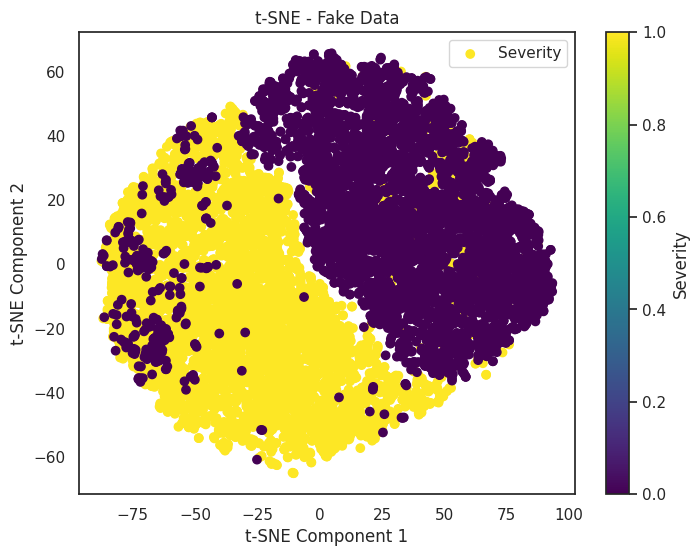

In [ ]:
#look at the data before cosine filtering
fake_data = fake.copy()  # to avoid modifying the original data
x_scaled = StandardScaler().fit_transform(fake_data.drop('severity', axis=1))

tsne = TSNE(n_components=2, random_state=42)  # Set the number of components you want to keep
tsne_result = tsne.fit_transform(x_scaled)

status_labels = fake_data['severity']

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=status_labels, cmap='viridis', label='Severity')
plt.title('t-SNE - Fake Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Severity')
plt.legend()
plt.show()

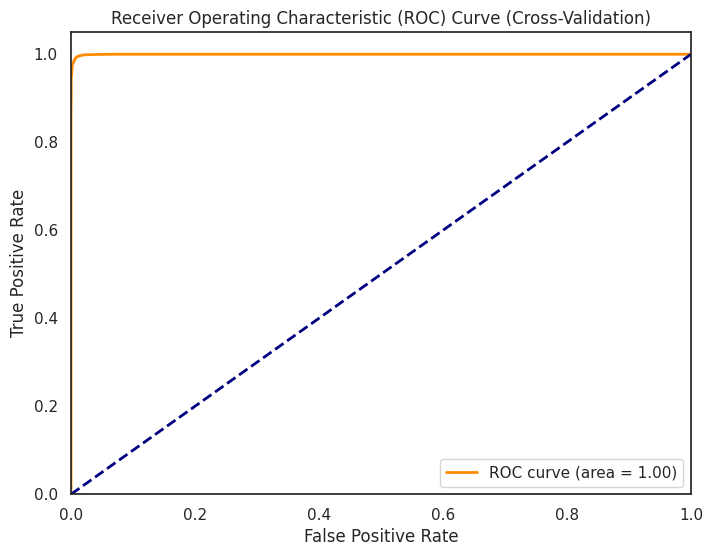

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt



# ROC evaluation
y_true_prob_cv = cross_val_predict(clf_true, X_train, y_train, cv=5, method='predict_proba')[:, 1]

fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_train, y_true_prob_cv)

roc_auc_cv = roc_auc_score(y_train, y_true_prob_cv)

plt.figure(figsize=(8, 6))
plt.plot(fpr_cv, tpr_cv, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_cv))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Cross-Validation)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#The code is designed to find and keep only the data in fake that are close to the data in real when comparing vectors within the same "severity" category. The process involves
#calculating the cosine similarity between each vector in real and its corresponding vectors in fake (belonging to the same "severity" category), and then selecting the N closest
#neighbors based on these similarity scores.
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from numpy import dot
from numpy.linalg import norm

def compute_cosine_similarity(vector1, vector2):
    return dot(vector1, vector2) / (norm(vector1) * norm(vector2))

df1 = real
df2 = fake

neighbor_vectors = []

grouped_df2 = df2.groupby('severity')

for _, target_vector in df1.iterrows():
    target_severity = target_vector['severity']

    group = grouped_df2.get_group(target_severity)

    target_vector_values = target_vector.drop('severity').values.reshape(1, -1)
    group_values = group.drop('severity', axis=1).values

    similarities = cosine_similarity(target_vector_values, group_values).flatten()

    # Getting indices of N closest neighbors
    n = 5  # Number of closest neighbors to select
    closest_indices = similarities.argsort()[::-1][:n]

    closest_vectors = group.iloc[closest_indices]  # Using iloc instead of loc
    neighbor_vectors.extend(closest_vectors.values)

df_neighbors = pd.DataFrame(neighbor_vectors, columns=df2.columns)

# Removing duplicates from df_neighbors
df_neighbors = df_neighbors.drop_duplicates()

df_neighbors.to_csv('/content/drive/MyDrive/thesis/Redo/data augmentation/data augmentation/data/beta_severity_lfc_1_nosm_fake_neighbor_vectors_all.csv', index=False)
df_neighbors.head()

MPO      SOX8       ITGA2B  GTF2IRD1      UPP2    CEACAM21  \
0  -250.943613  3.592946  6537.609616  0.765103 -0.321093  553.643637   
1 -1061.749657  5.585805  6240.021901  0.991370 -0.152552  477.727110   
2  -223.850310  7.399117  5195.365386  1.252213  0.046524  584.967715   
3  -444.249139  2.926842  5840.709805  0.624052  0.477865  399.496233   
4  -152.233280  0.206093  5266.709930  0.331762  0.913888  432.182633   

    CEACAM7       TKTL1      TEAD3     PGLYRP1  ...      FCGBP      CCL4L2  \
0  2.539407  198.805960   1.924628   23.291286  ...  40.281579  264.538861   
1  2.751468  146.487450   8.049248 -799.563225  ...  28.026197   49.611640   
2  2.450357  168.558983   6.376421 -103.592523  ...  45.070661  276.163062   
3  3.335229  132.226115  14.781041 -164.943179  ...  36.683406  120.168319   
4  3.355625  129.394943  11.651861 -642.137473  ...  -0.246927  -27.464920   

   LOC102723475  LOC102723996       NEFL     TEX52    PRRT1B  SEPT5.GP1BB  \
0     19.891147      7.801033 -12.673645  0.073356  0.762175     4.936539   
1     36.536534      6.060406  13.644627  0.322354  0.557907     0.715617   
2     32.110186      7.056481  10.987500  0.632851  0.781421     4.912012   
3     18.905944      6.309248   1.711032  0.435595  1.270584    -1.403508   
4     30.492660      2.286453   2.489188  0.486996  0.965781     4.148952   

   LOC122319436  severity  
0     -1.110465       1.0  
1     -0.427226       1.0  
2     -1.192305       1.0  
3     -0.393500       1.0  
4      2.687375       1.0  

[5 rows x 917 columns]

In [ ]:
df_neighbors.shape

(453, 917)

In [ ]:
fake=df_neighbors

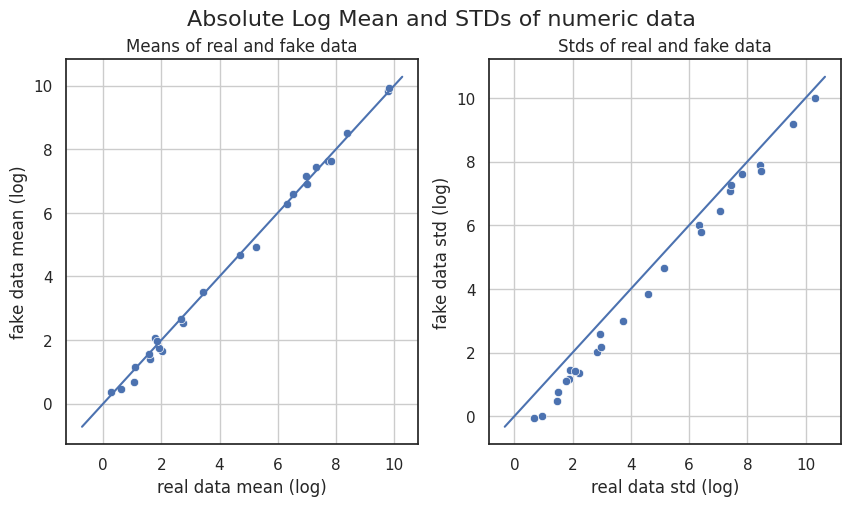

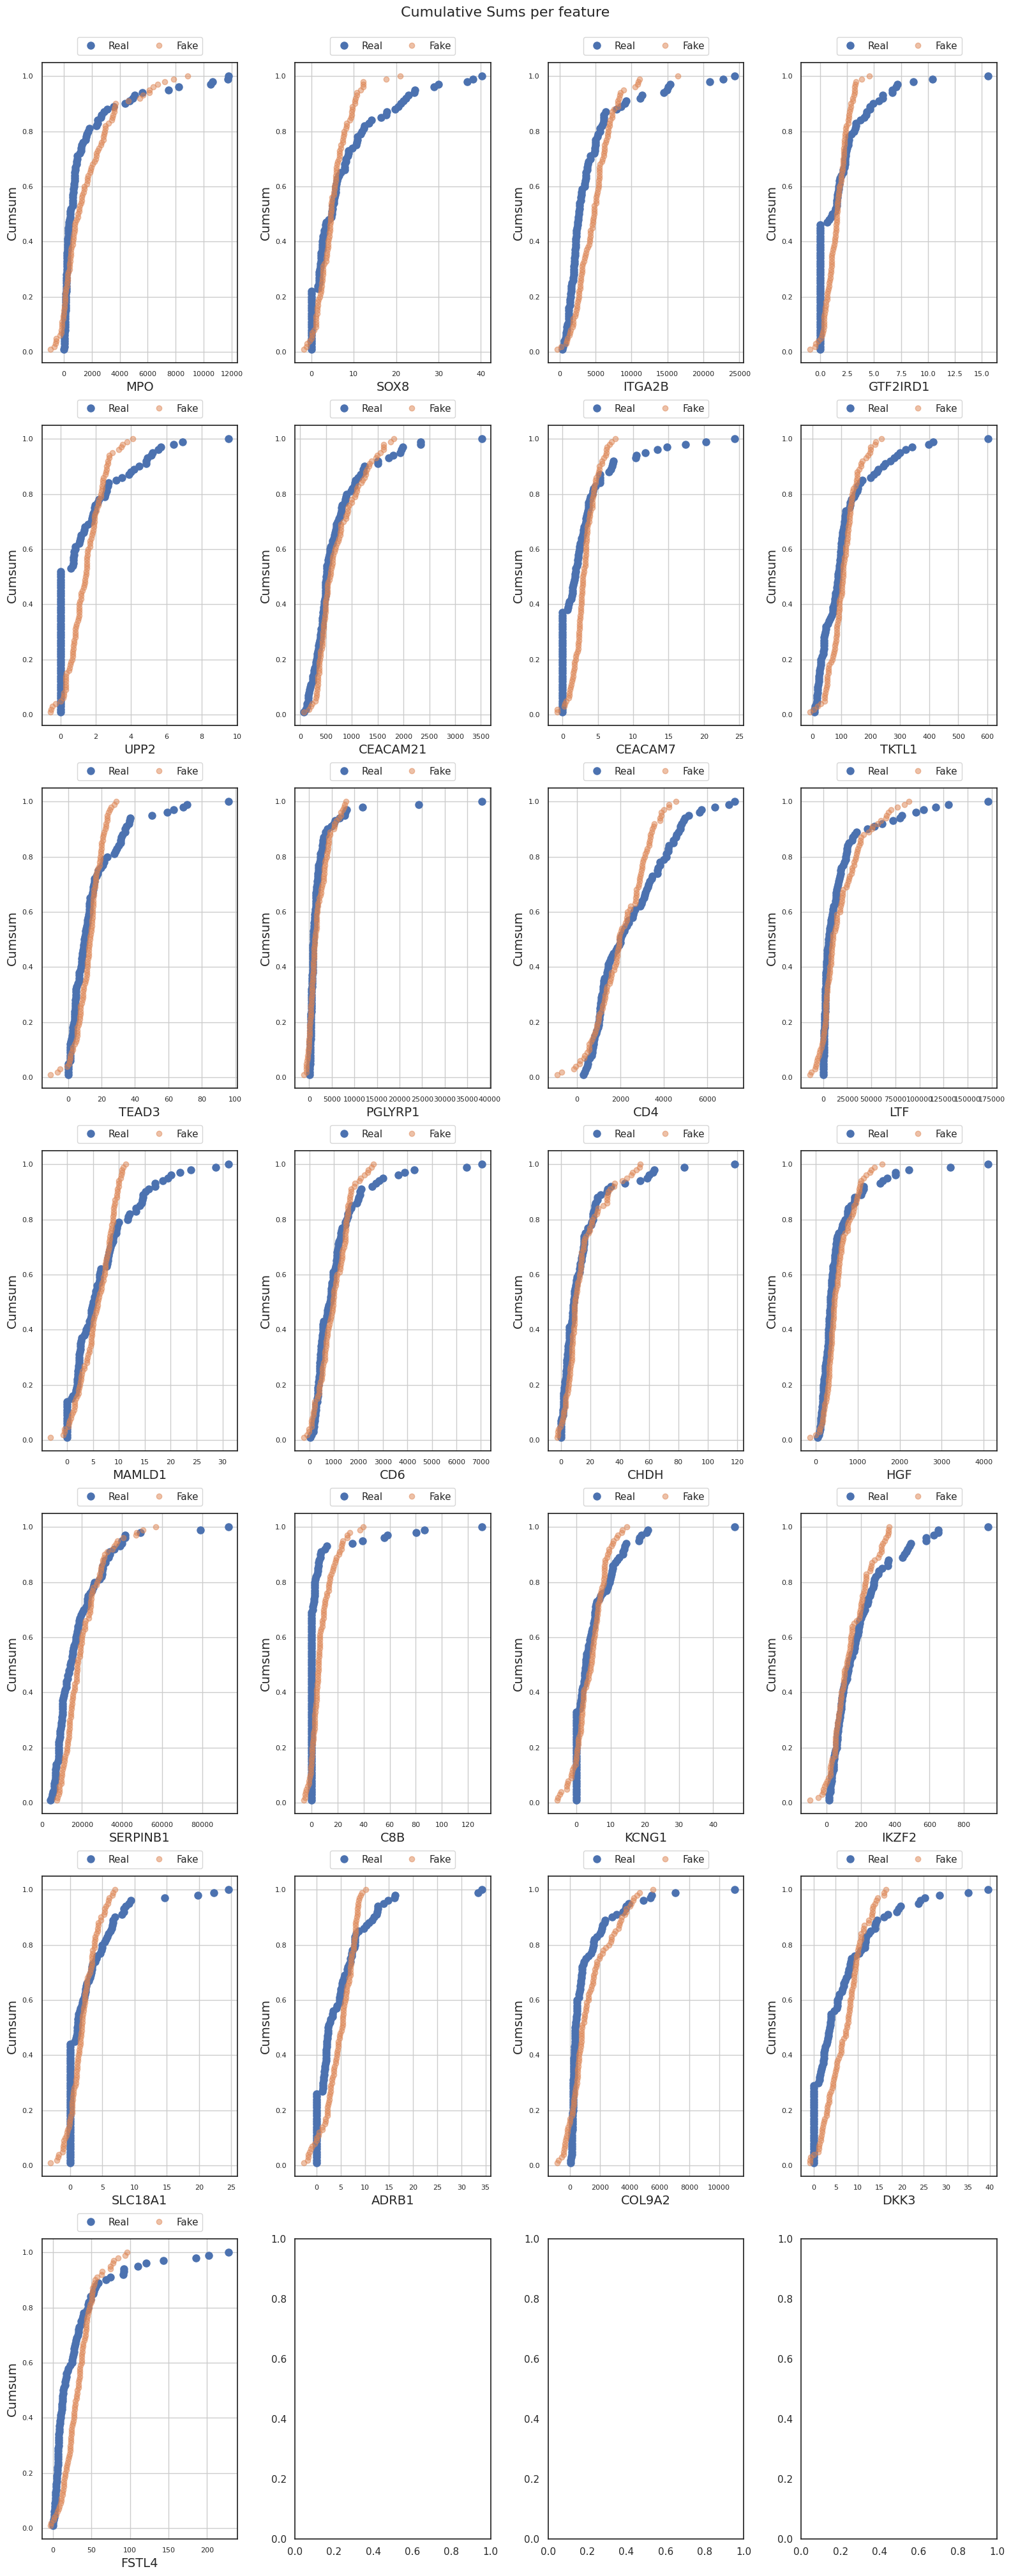

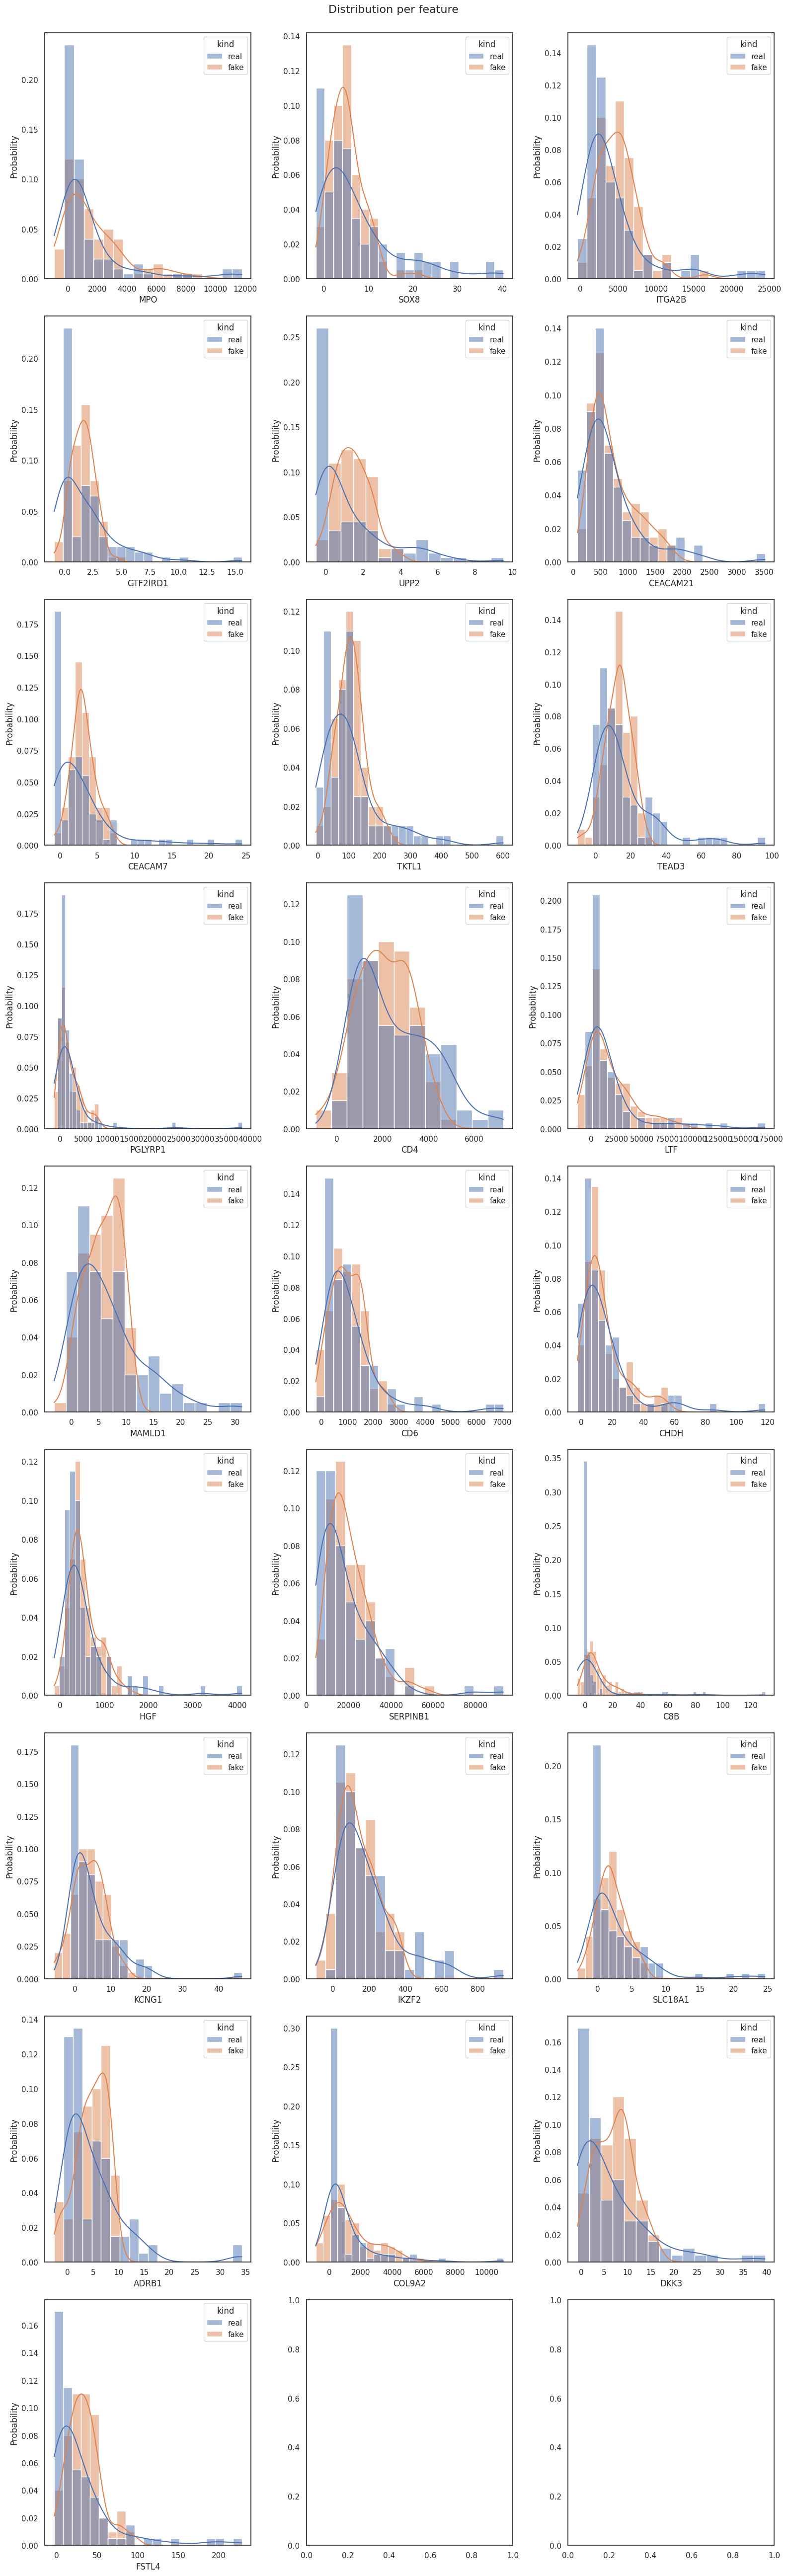

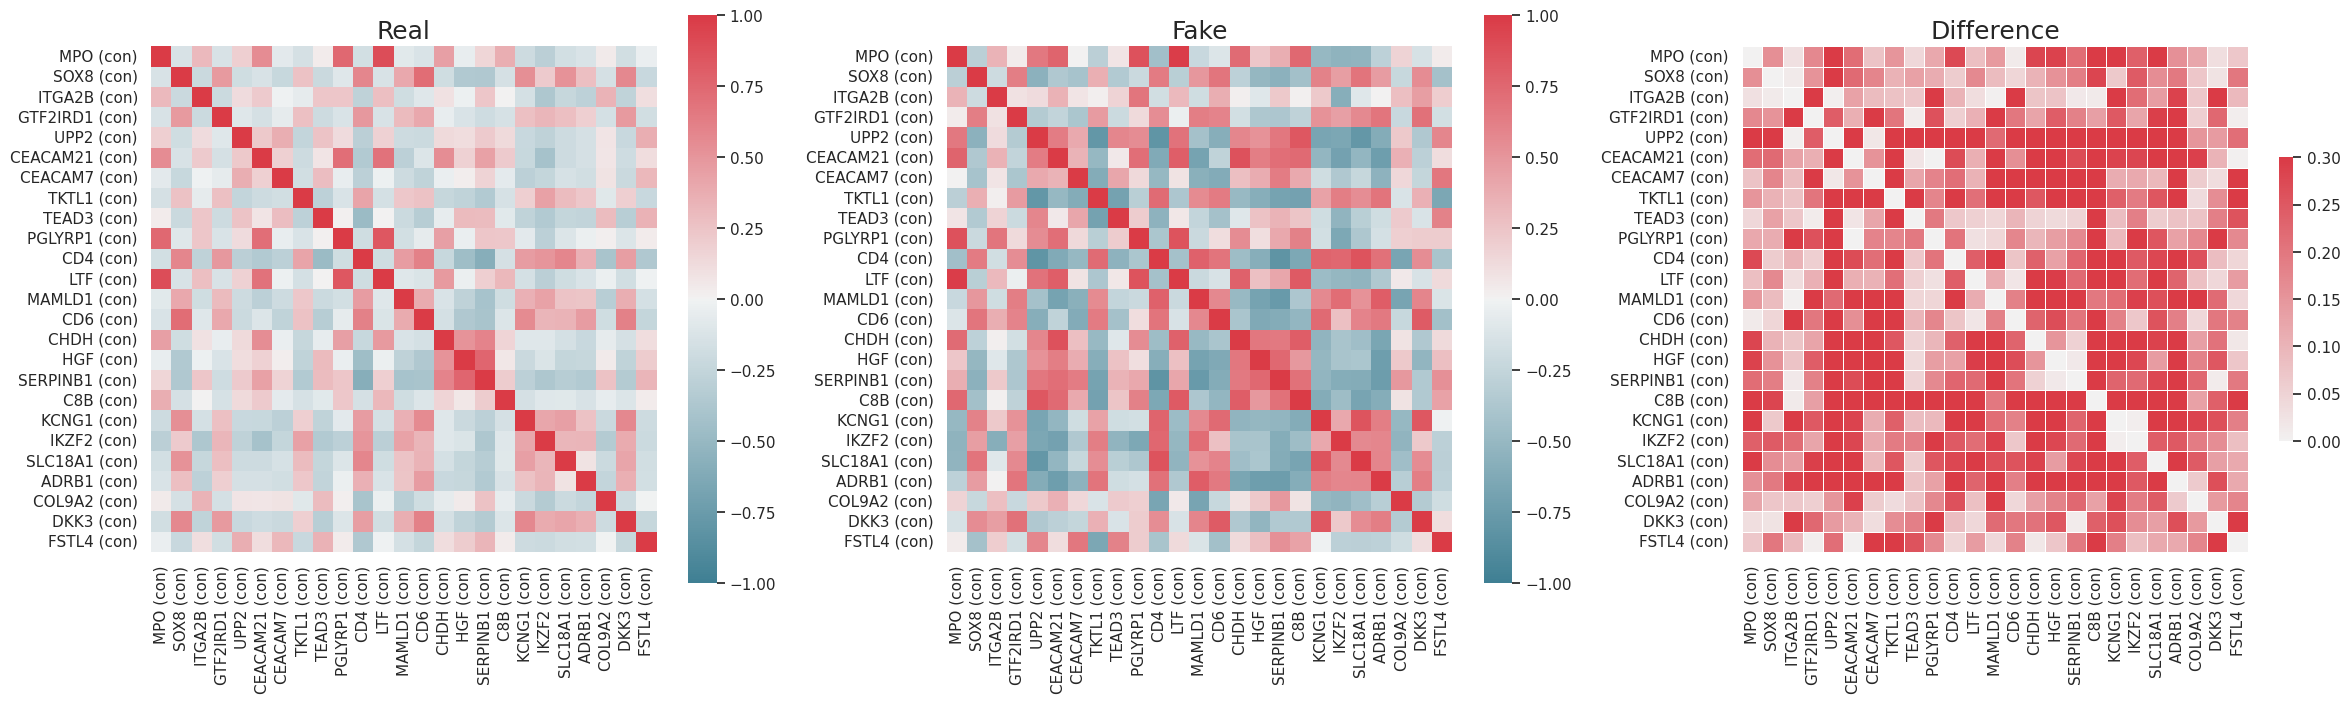

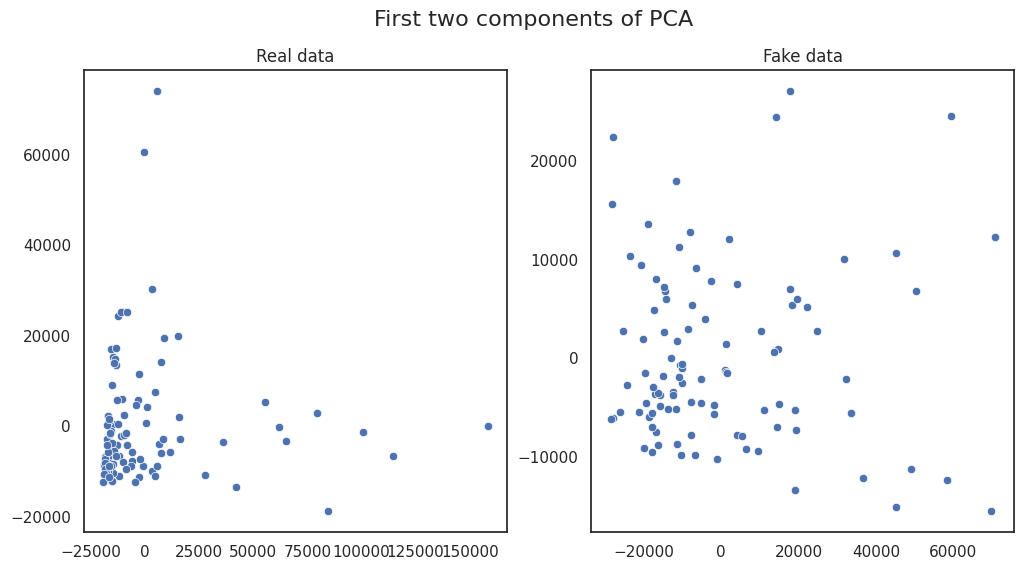

In [ ]:
#evaluation after cosine similarity
# Specify the subset of variables you want to consider
selected_vars = fake.columns[0:25]  # Replace with your desired variable names

real_subset = real[selected_vars]
fake_subset = fake[selected_vars]


table_evaluator = TableEvaluator(real_subset, fake_subset)
table_evaluator.visual_evaluation()

In [ ]:
fake.head()

MPO      SOX8       ITGA2B  GTF2IRD1      UPP2    CEACAM21  \
0  -250.943613  3.592946  6537.609616  0.765103 -0.321093  553.643637   
1 -1061.749657  5.585805  6240.021901  0.991370 -0.152552  477.727110   
2  -223.850310  7.399117  5195.365386  1.252213  0.046524  584.967715   
3  -444.249139  2.926842  5840.709805  0.624052  0.477865  399.496233   
4  -152.233280  0.206093  5266.709930  0.331762  0.913888  432.182633   

    CEACAM7       TKTL1      TEAD3     PGLYRP1  ...      FCGBP      CCL4L2  \
0  2.539407  198.805960   1.924628   23.291286  ...  40.281579  264.538861   
1  2.751468  146.487450   8.049248 -799.563225  ...  28.026197   49.611640   
2  2.450357  168.558983   6.376421 -103.592523  ...  45.070661  276.163062   
3  3.335229  132.226115  14.781041 -164.943179  ...  36.683406  120.168319   
4  3.355625  129.394943  11.651861 -642.137473  ...  -0.246927  -27.464920   

   LOC102723475  LOC102723996       NEFL     TEX52    PRRT1B  SEPT5.GP1BB  \
0     19.891147      7.801033 -12.673645  0.073356  0.762175     4.936539   
1     36.536534      6.060406  13.644627  0.322354  0.557907     0.715617   
2     32.110186      7.056481  10.987500  0.632851  0.781421     4.912012   
3     18.905944      6.309248   1.711032  0.435595  1.270584    -1.403508   
4     30.492660      2.286453   2.489188  0.486996  0.965781     4.148952   

   LOC122319436  severity  
0     -1.110465       1.0  
1     -0.427226       1.0  
2     -1.192305       1.0  
3     -0.393500       1.0  
4      2.687375       1.0  

[5 rows x 917 columns]

In [ ]:
real.head()

MPO       SOX8       ITGA2B  GTF2IRD1  UPP2     CEACAM21   CEACAM7  \
0   660.358182   5.584424  2058.558435  1.396106   0.0   345.536258  1.396106   
1  2329.249354   0.000000  5616.906229  2.363520   0.0   166.628188  0.000000   
2   183.042083   2.331746  1109.911227  2.331746   0.0  1046.954078  6.995239   
3   167.661469  16.409420  2352.968197  0.000000   0.0   130.561910  1.426906   
4    27.954080   0.000000  2206.042830  0.000000   0.0  1055.266528  0.000000   

        TKTL1      TEAD3      PGLYRP1  ...      FCGBP       CCL4L2  \
0   97.727427   1.396106   351.818736  ...  34.204599    30.016281   
1  100.449617   4.727041  1403.931117  ...  66.178571   219.807397   
2   90.938105   9.326985   741.495316  ...  13.990478    32.644448   
3  267.544898   2.853812   191.205421  ...  48.514808  1334.870678   
4   67.555694  12.812287   384.368603  ...  24.459820   100.168787   

   LOC102723475  LOC102723996       NEFL     TEX52    PRRT1B  SEPT5.GP1BB  \
0     29.318228      1.396106  60.730615  2.094159  1.396106     3.490265   
1      7.090561      3.545281  33.089286  3.545281  7.090561     9.454082   
2     29.146828      0.000000   6.995239  0.000000  0.000000     9.326985   
3      2.853812      8.561437  64.210776  2.140359  0.000000     4.280718   
4     17.471300      2.329507  22.130314  0.000000  0.000000     0.000000   

   LOC122319436  severity  
0      2.094159         1  
1      0.000000         0  
2      1.165873         1  
3      0.000000         0  
4      2.329507         0  

[5 rows x 917 columns]

In [ ]:
fake.describe()

MPO        SOX8        ITGA2B    GTF2IRD1        UPP2  \
count   453.000000  453.000000    453.000000  453.000000  453.000000   
mean   1412.889629    5.118223   4892.557996    1.488412    1.374703   
std    1868.807522    3.757736   2894.079812    1.053812    0.953094   
min   -1583.986115   -3.874760  -3115.754566   -1.613434   -0.766440   
25%     249.410829    2.698082   2775.308487    0.688038    0.690434   
50%     944.995166    4.568766   4683.767284    1.495712    1.334885   
75%    1877.886891    7.381087   6537.609616    2.216205    2.037973   
max    9526.272456   23.253647  16480.525752    4.677522    4.436223   

          CEACAM21     CEACAM7       TKTL1       TEAD3       PGLYRP1  ...  \
count   453.000000  453.000000  453.000000  453.000000    453.000000  ...   
mean    662.553746    3.213352  105.545059   13.495184   1840.391590  ...   
std     332.893379    1.583666   45.029292    7.005094   2187.195734  ...   
min     -71.445915   -0.779673  -20.016420  -10.338897  -1801.825280  ...   
25%     429.839691    2.063205   75.140739    8.596964    345.016204  ...   
50%     569.439027    3.011105  104.009793   13.317123   1267.843526  ...   
75%     788.142089    4.283075  132.763856   18.216692   2841.053948  ...   
max    1815.944237    7.675073  237.274151   32.962154  11900.424386  ...   

            FCGBP       CCL4L2  LOC102723475  LOC102723996        NEFL  \
count  453.000000   453.000000    453.000000    453.000000  453.000000   
mean    51.344715   303.882413     35.358268      5.410034   17.137106   
std     39.631451   208.675220     28.126244      3.692718   24.307137   
min    -52.061099  -211.361681    -21.942753     -7.114903  -60.472258   
25%     23.156730   163.011604     15.928999      2.898106    0.818579   
50%     47.377568   275.766563     29.101575      4.974212   13.355644   
75%     75.565527   433.186624     49.278849      7.891696   33.071444   
max    217.957300  1072.177946    143.286465     15.578920  113.997137   

            TEX52      PRRT1B  SEPT5.GP1BB  LOC122319436    severity  
count  453.000000  453.000000   453.000000    453.000000  453.000000  
mean     1.315221    1.514805     9.762549      2.516894    0.512141  
std      1.172537    1.041214     9.211503      3.184499    0.500405  
min     -1.809592   -1.104399   -14.248145     -4.212247    0.000000  
25%      0.534847    0.823686     4.073591      0.298242    0.000000  
50%      1.248235    1.333369     8.114475      1.853839    1.000000  
75%      1.960671    2.055366    13.240024      4.368618    1.000000  
max      4.755914    5.866666    43.024263     15.502779    1.000000  

[8 rows x 917 columns]

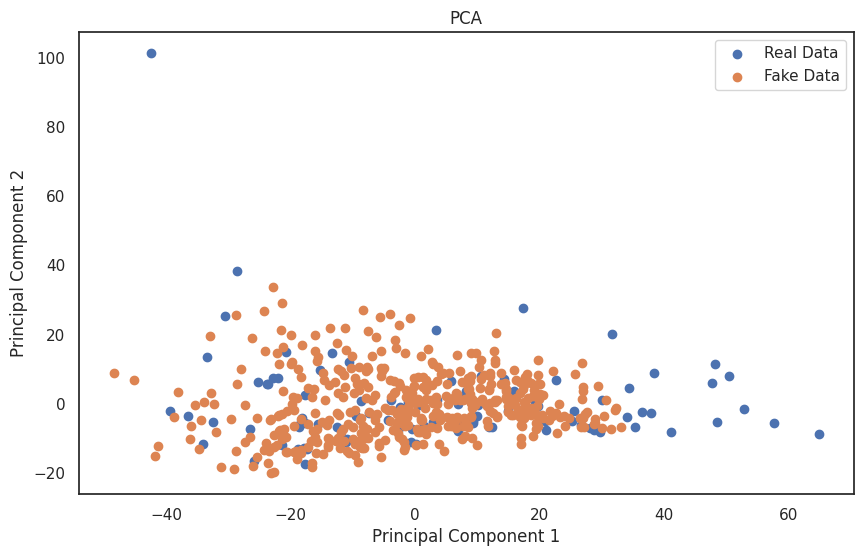

In [ ]:
# Concatenate real and fake dataframes
combined_data = pd.concat([real, fake], ignore_index=True)
x_scaled = StandardScaler().fit_transform(combined_data)

pca = PCA(n_components=2)  # 2 is the number of components
pca_result = pca.fit_transform(x_scaled)

# Creating separate arrays for real and fake data points in the reduced dimension
real_pca = pca_result[:len(real)]
fake_pca = pca_result[len(real):]

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(real_pca[:, 0], real_pca[:, 1], label='Real Data')
plt.scatter(fake_pca[:, 0], fake_pca[:, 1], label='Fake Data')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


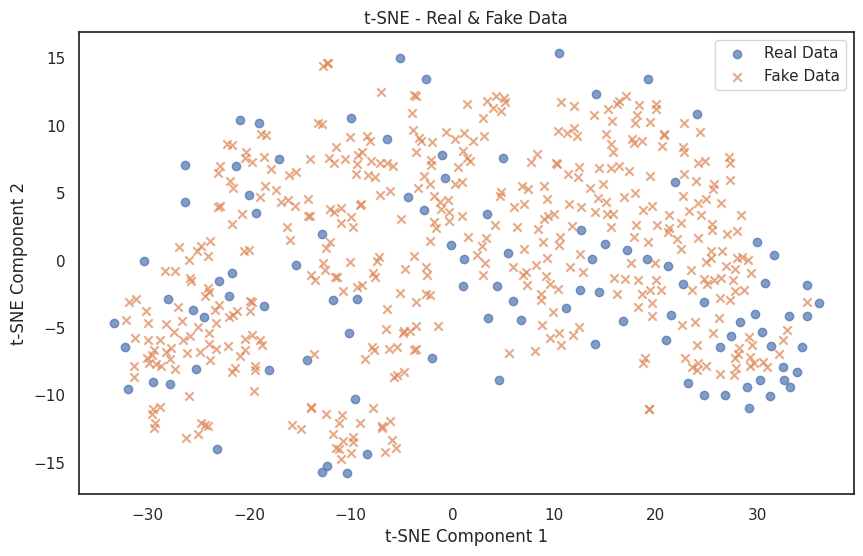

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE  # Import t-SNE from scikit-learn


tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(x_scaled)

real_tsne = tsne_result[:len(real)]
fake_tsne = tsne_result[len(real):]

# Ploting the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(real_tsne[:, 0], real_tsne[:, 1], label='Real Data', alpha=0.7, marker='o')
plt.scatter(fake_tsne[:, 0], fake_tsne[:, 1], label='Fake Data', alpha=0.7, marker='x')
plt.title('t-SNE - Real & Fake Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()



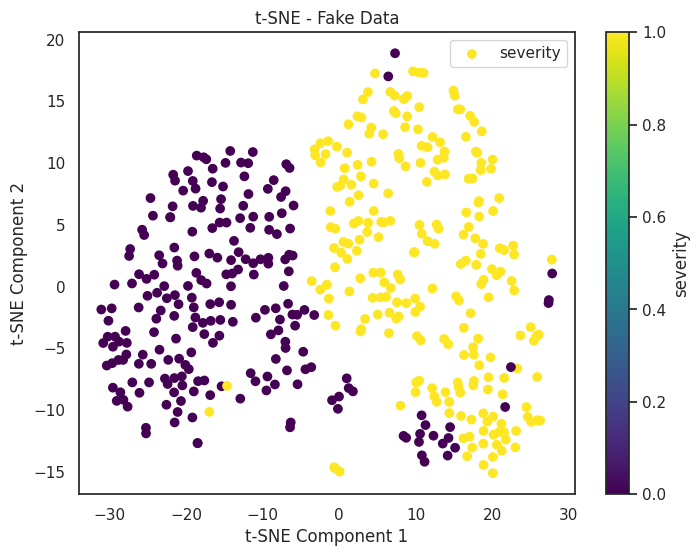

In [ ]:
# Select only the fake data for t-SNE
fake_data = fake.copy()  # Copy the fake_subset dataframe to avoid modifying the original data
x_scaled = StandardScaler().fit_transform(fake_data.drop('severity', axis=1))  # Drop the 'severity' column for t-SNE

tsne = TSNE(n_components=2, random_state=42)  # Set the number of components you want to keep
tsne_result = tsne.fit_transform(x_scaled)

severity_labels = fake_data['severity']

# Plot t-SNE results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=severity_labels, cmap='viridis', label='severity')
plt.title('t-SNE - Fake Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='severity')
plt.legend()
plt.show()

In [ ]:
y_train = combined_data.iloc[:, -1].values
X_train = combined_data.iloc[:, :-1].values

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf_true = RandomForestClassifier(n_estimators=100)

cv_scores = cross_val_score(clf_true, X_train, y_train, cv=5, scoring='accuracy')  # You can adjust the number of folds (cv) as needed

# Printing cross-validation scores and other evaluation metrics
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

y_true_pred_cv = cross_val_predict(clf_true, X_train, y_train, cv=5)  # fit is called implicitly here
print("Cross-Validation classification report:")
print(metrics.classification_report(y_train, y_true_pred_cv))


Cross-Validation Scores: [0.82882883 0.99099099 0.94594595 0.98181818 0.98181818]
Mean Accuracy: 0.9458804258804259
Cross-Validation classification report:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       272
         1.0       0.94      0.95      0.95       281

    accuracy                           0.95       553
   macro avg       0.95      0.95      0.95       553
weighted avg       0.95      0.95      0.95       553



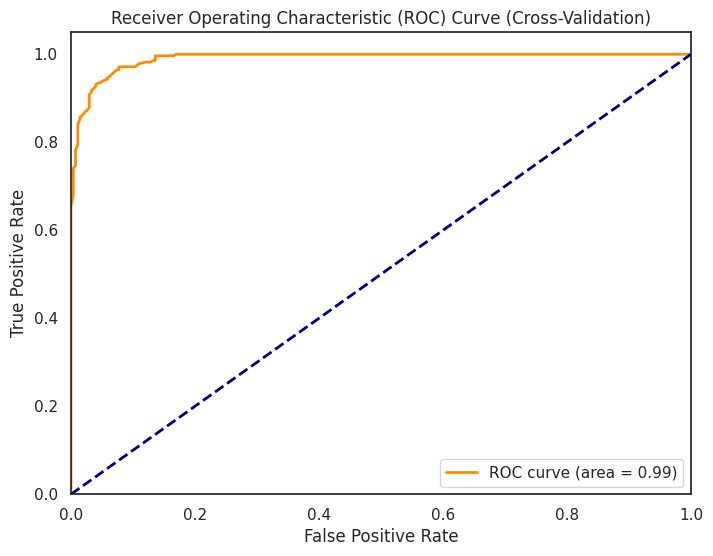

In [ ]:


# Create the Random Forest classifier
#clf_true = RandomForestClassifier(n_estimators=100)

# Obtain predicted probabilities using cross-validation
y_true_prob_cv = cross_val_predict(clf_true, X_train, y_train, cv=5, method='predict_proba')[:, 1]

# Calculate the ROC curve
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y_train, y_true_prob_cv)

# Calculate the AUC (Area Under the Curve) for ROC
roc_auc_cv = roc_auc_score(y_train, y_true_prob_cv)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_cv, tpr_cv, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_cv))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Cross-Validation)')
plt.legend(loc="lower right")
plt.show()
